In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier


**Importing Datasets**

In [3]:
train_df=pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_df=pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [4]:
print(train_df.shape)
print(test_df.shape)
print(train_df.columns)
print(train_df.info)

(100000, 76)
(10000, 75)
Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
      

In [5]:
train_df.head()

MachineID   ProductName EngineVersion  \
0  f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1  dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2  fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3  38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4  32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   

         AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0   4.18.1807.18075     1.275.1003.0           0                      7.0   
1   4.18.1807.18075     1.273.1465.0           0                      7.0   
2   4.18.1807.18075     1.275.1546.0           0                      7.0   
3  4.12.17007.18011     1.275.1141.0           0                      7.0   
4    4.13.17134.228     1.275.1283.0           0                      7.0   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                     0            53447.0                            1.0   
1                     0            53447.0                            1.0   
2                     0            53447.0                            1.0   
3                     0            46413.0                            2.0   
4                     0            40466.0                            2.0   

   ...  IsSecureBootEnabled  IsVirtualDevice  IsTouchEnabled  IsPenCapable  \
0  ...                    0              0.0               1             0   
1  ...                    1              0.0               0             0   
2  ...                    0              0.0               0             0   
3  ...                    1              0.0               0             0   
4  ...                    0              0.0               0             0   

   IsAlwaysOnAlwaysConnectedCapable  IsGamer RegionIdentifier  \
0                               1.0      0.0              6.0   
1                               0.0      0.0             10.0   
2                               0.0      1.0              6.0   
3                               0.0      0.0             12.0   
4                               0.0      1.0              7.0   

                DateAS      DateOS  target  
0  2018-09-10 10:11:00  2018-04-17       0  
1  2018-08-16 00:01:00  2018-08-14       1  
2  2018-09-20 23:20:00  2018-09-11       1  
3  2018-09-14 00:32:00  2018-01-03       1  
4  2018-09-15 19:34:00  2018-09-11       0  

[5 rows x 76 columns]

In [6]:
train_df.tail()

MachineID   ProductName EngineVersion  \
99995  a378b2196a7a1d8ee0d4f989ee46730e  win8defender   1.1.15200.1   
99996  7f4433ca05d24b9bbdd3932f8b05e61f  win8defender   1.1.15100.1   
99997  d6852dfff534e03d5ddfd3c7875ab072  win8defender   1.1.15200.1   
99998  70a8dc682128c9ff78a3de5aea9dac74  win8defender   1.1.14901.4   
99999  ad9c385b53f2ca788933a39603b84eda  win8defender   1.1.15000.2   

             AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
99995   4.18.1807.18075     1.275.1582.0           0                      7.0   
99996   4.18.1806.18062     1.273.1156.0           0                      7.0   
99997   4.18.1807.18075      1.275.209.0           0                      7.0   
99998  4.16.17656.18052      1.269.641.0           0                      7.0   
99999   4.18.1806.18062     1.271.1003.0           0                      7.0   

       IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
99995                     0            68585.0                            2.0   
99996                     0            11280.0                            2.0   
99997                     0            53447.0                            1.0   
99998                     0            53447.0                            1.0   
99999                     0             7945.0                            2.0   

       ...  IsSecureBootEnabled  IsVirtualDevice  IsTouchEnabled  \
99995  ...                    0              0.0               0   
99996  ...                    0              0.0               0   
99997  ...                    1              0.0               0   
99998  ...                    1              0.0               1   
99999  ...                    1              0.0               0   

       IsPenCapable  IsAlwaysOnAlwaysConnectedCapable  IsGamer  \
99995             0                               0.0      1.0   
99996             0                               0.0      0.0   
99997             0                               0.0      1.0   
99998             1                               1.0      0.0   
99999             0                               0.0      1.0   

      RegionIdentifier               DateAS      DateOS  target  
99995              7.0  2018-09-21 00:59:00  2018-09-20       0  
99996              3.0  2018-08-10 07:23:00  2018-07-10       0  
99997              1.0  2018-08-26 23:51:00  2018-03-13       1  
99998              1.0  2018-06-04 17:13:00  2018-05-08       0  
99999             11.0  2018-07-14 15:36:00  2018-08-14       0  

[5 rows x 76 columns]

****EDA****


In [7]:
train_df.nunique()

MachineID           99835
ProductName             2
EngineVersion          37
AppVersion             69
SignatureVersion     2735
                    ...  
IsGamer                 2
RegionIdentifier       15
DateAS               2695
DateOS                112
target                  2
Length: 76, dtype: int64

In [8]:
for i in train_df.columns:
    print(f"{i}:{train_df[i].isnull().sum()}")

MachineID:0
ProductName:0
EngineVersion:0
AppVersion:0
SignatureVersion:0
IsBetaUser:0
RealTimeProtectionState:66
IsPassiveModeEnabled:0
AntivirusConfigID:76
NumAntivirusProductsInstalled:76
NumAntivirusProductsEnabled:76
HasTpm:0
CountryID:0
CityID:623
GeoRegionID:0
LocaleEnglishNameID:0
PlatformType:0
Processor:0
OSVersion:0
OSBuildNumber:0
OSProductSuite:0
OsPlatformSubRelease:0
OSBuildLab:0
SKUEditionName:0
IsSystemProtected:76
AutoSampleSubmissionEnabled:0
SMode:981
IEVersionID:107
FirewallEnabled:166
EnableLUA:19
MDC2FormFactor:0
DeviceFamily:0
OEMNameID:212
OEMModelID:228
ProcessorCoreCount:85
ProcessorManufacturerID:85
ProcessorModelID:85
PrimaryDiskCapacityMB:110
PrimaryDiskType:23
SystemVolumeCapacityMB:110
HasOpticalDiskDrive:0
TotalPhysicalRAMMB:151
ChassisType:2
PrimaryDisplayDiagonalInches:72
PrimaryDisplayResolutionHorizontal:72
PrimaryDisplayResolutionVertical:72
PowerPlatformRole:0
InternalBatteryNumberOfCharges:515
NumericOSVersion:0
OSArchitecture:0
OSBranch:0
OSBuil

In [9]:
for i in train_df.columns :
    print(f" {i}:{train_df[i].dtypes}")

 MachineID:object
 ProductName:object
 EngineVersion:object
 AppVersion:object
 SignatureVersion:object
 IsBetaUser:int64
 RealTimeProtectionState:float64
 IsPassiveModeEnabled:int64
 AntivirusConfigID:float64
 NumAntivirusProductsInstalled:float64
 NumAntivirusProductsEnabled:float64
 HasTpm:int64
 CountryID:int64
 CityID:float64
 GeoRegionID:float64
 LocaleEnglishNameID:int64
 PlatformType:object
 Processor:object
 OSVersion:object
 OSBuildNumber:int64
 OSProductSuite:int64
 OsPlatformSubRelease:object
 OSBuildLab:object
 SKUEditionName:object
 IsSystemProtected:float64
 AutoSampleSubmissionEnabled:int64
 SMode:float64
 IEVersionID:float64
 FirewallEnabled:float64
 EnableLUA:float64
 MDC2FormFactor:object
 DeviceFamily:object
 OEMNameID:float64
 OEMModelID:float64
 ProcessorCoreCount:float64
 ProcessorManufacturerID:float64
 ProcessorModelID:float64
 PrimaryDiskCapacityMB:float64
 PrimaryDiskType:object
 SystemVolumeCapacityMB:float64
 HasOpticalDiskDrive:int64
 TotalPhysicalRAMMB:fl

In [4]:
# Columns that are in integer and float type and should be in categorical type should be converted  to object type
int_col = [
    "CountryID",
    "CityID",
    "GeoRegionID",
    "LocaleEnglishNameID",
    "IEVersionID",
    "OEMNameID",
    "OEMModelID",
    "ProcessorManufacturerID",
    "ProcessorModelID",
    "OSInstallLanguageID",
    "OSUILocaleID",
    "FirmwareManufacturerID",
    "FirmwareVersionID",
    "RegionIdentifier",
    "target",
]
# Convert specified columns to object
train_df[int_col] = train_df[int_col].astype("object")

# Verify data types
print(train_df.dtypes)

MachineID            object
ProductName          object
EngineVersion        object
AppVersion           object
SignatureVersion     object
                     ...   
IsGamer             float64
RegionIdentifier     object
DateAS               object
DateOS               object
target               object
Length: 76, dtype: object


In [11]:
#find_duplicate_columns
duplicate_columns = []
for i in range(len(train_df.columns)):
    for j in range(i + 1, len(train_df.columns)):
        if train_df.iloc[:, i].equals(train_df.iloc[:, j]):
            duplicate_columns.append(train_df.columns[j])
print(duplicate_columns)

['AutoSampleSubmissionEnabled']


Why Should We Remove Them?
Reduce Overfitting
Redundant features can cause the model to overfit, especially in small datasets.

 Improve Model Performance
Less noise = faster training, simpler model.

Avoid Multicollinearity (in linear models)
Highly correlated features confuse models like Linear Regression or Logistic Regression, where the model tries to assign unique weights — but it can’t distinguish between the features.

 Dimensionality Reduction
Reduces dataset size without losing much information.

In [12]:
corr_threshold=0.99
#find Highly Correlated Columns (Only Numeric)
numeric_df=train_df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    corr_matrix = numeric_df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    correlated_columns=[column for column in upper_triangle.columns if any(upper_triangle[column]> corr_threshold)]
else:
    correlated_columns=[]
print(correlated_columns)


[]


Why are low variance columns useless (in most cases)?
They don't help distinguish between different outputs.
Machine learning models learn from variation in data.
Removing low variance columns can:
Reduce noise
Improve model performance
Make training faster

In [13]:
var_threshold=0.01
#find law variance columns (Only Numeric)
if not numeric_df.empty:
    selector = VarianceThreshold(var_threshold)
    selector.fit(numeric_df)
    low_variance_cols = [col for col, var in zip(numeric_df.columns, selector.variances_) if var < var_threshold]
else:
    low_varince_cols = []
print(low_variance_cols)

['IsBetaUser', 'HasTpm', 'AutoSampleSubmissionEnabled', 'SMode', 'IsPortableOS', 'IsFlightsDisabled', 'IsVirtualDevice']


In [14]:
#Find Constant Columnms
constant_columns = [col for col in train_df.columns if train_df[col].nunique() == 1]
print(constant_columns)

['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']


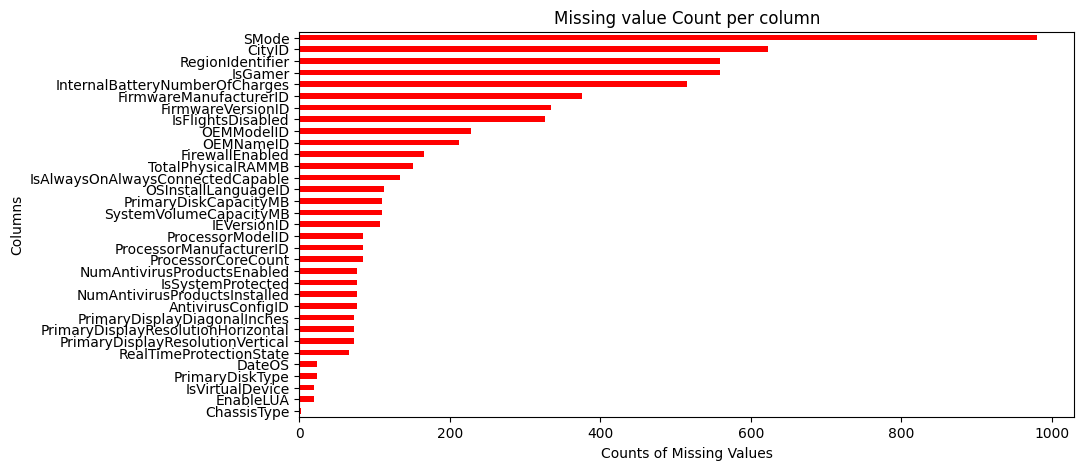

In [15]:
#Bar Plot of the Missing Value Counts
missing_counts = train_df.isnull().sum()
missing_counts = missing_counts[missing_counts>0] #Filtering out columns with no missing values
if not missing_counts.empty:
    plt.figure(figsize=(10,5))
    missing_counts.sort_values().plot(kind='barh', color="red")
    plt.xlabel("Counts of Missing Values")
    plt.ylabel("Columns")
    plt.title("Missing value Count per column")
    plt.show()
else:
    print("No missing values found in the dataset")

Helps you understand how each numeric feature is distributed (normal, skewed, presence of outliers, etc.
Detect Outliers:
The boxplot clearly shows outliers, which may affect your imputation method or model performance.
Understand Missing Data Impact:

You only plot features with missing values to visualize how those missing values may affect the distribution.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


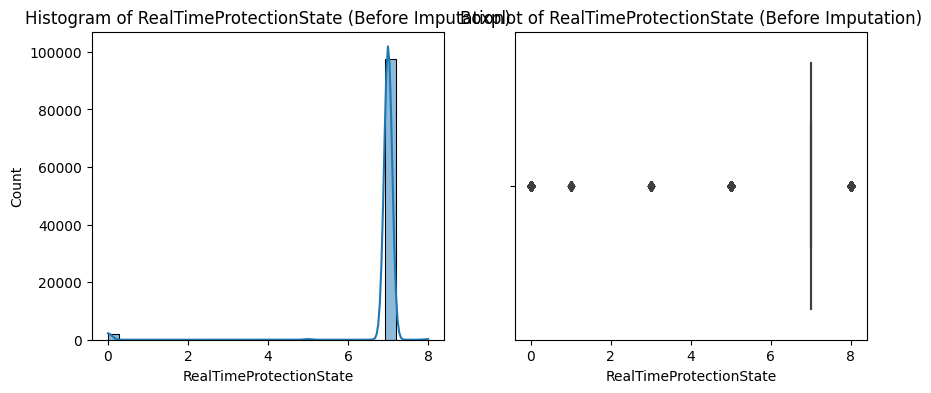

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


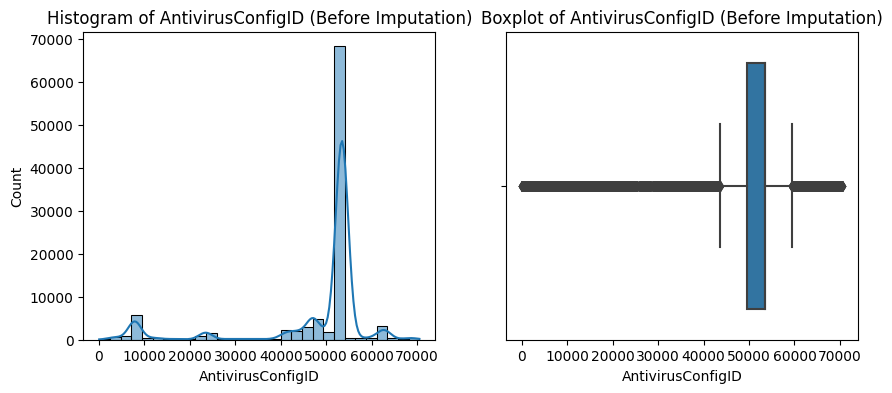

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


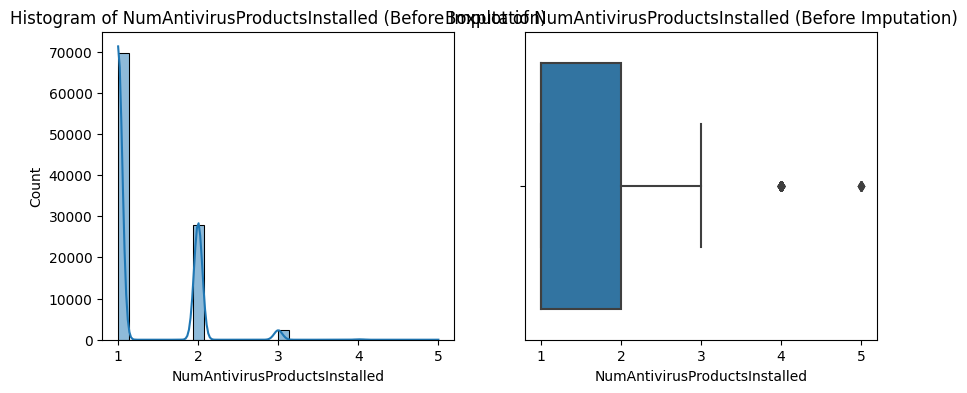

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


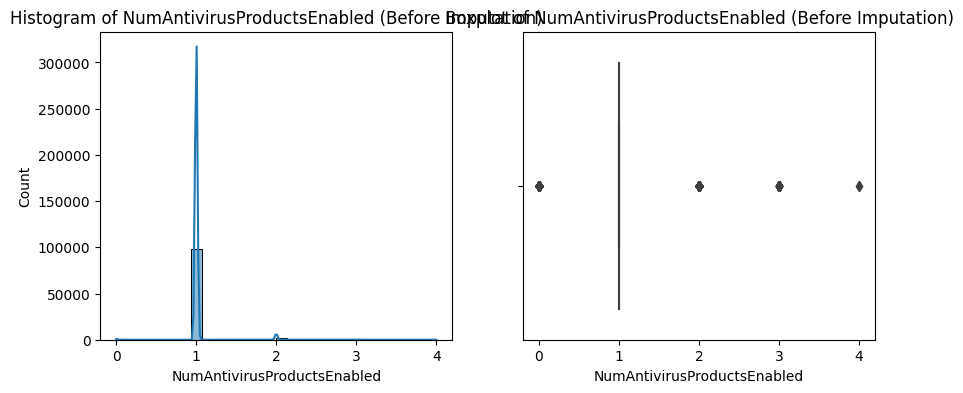

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


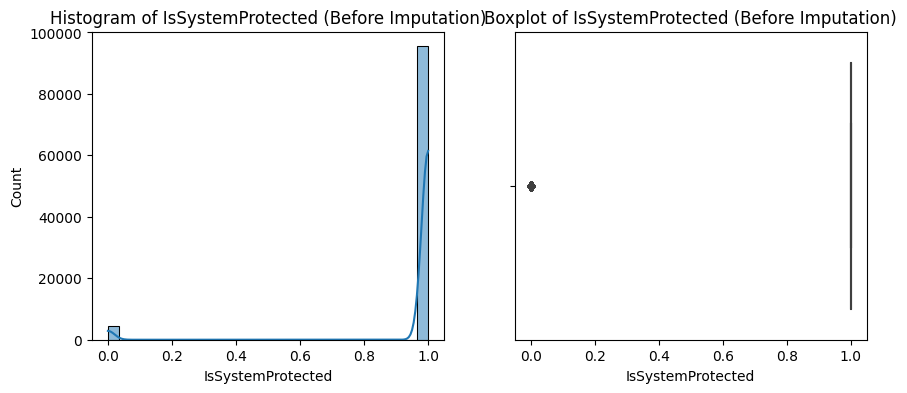

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


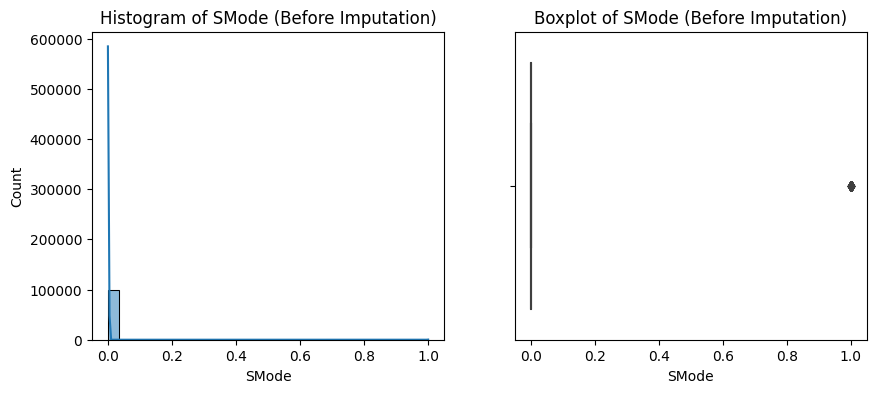

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


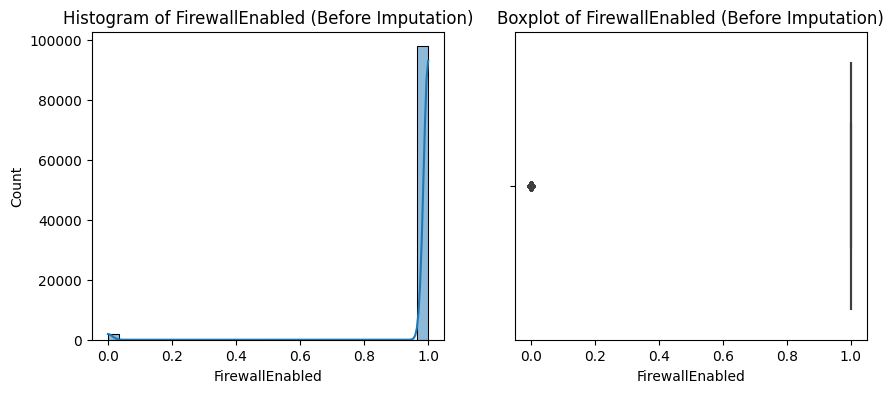

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


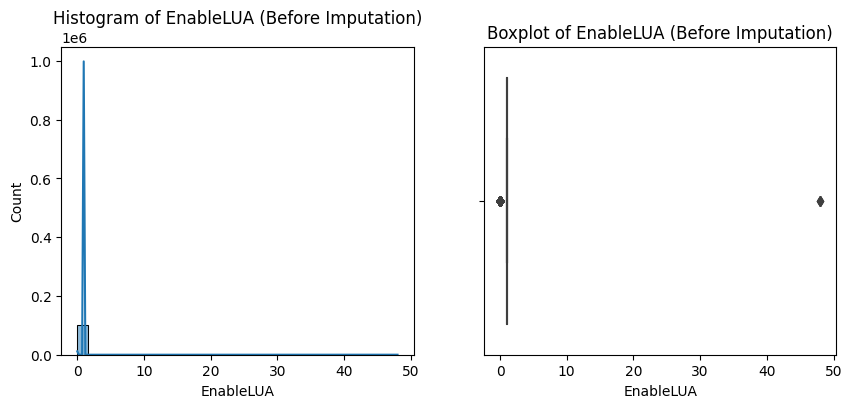

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


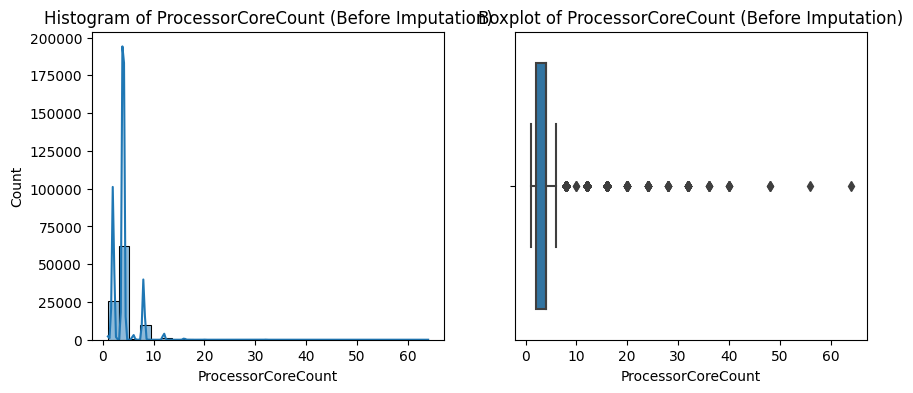

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


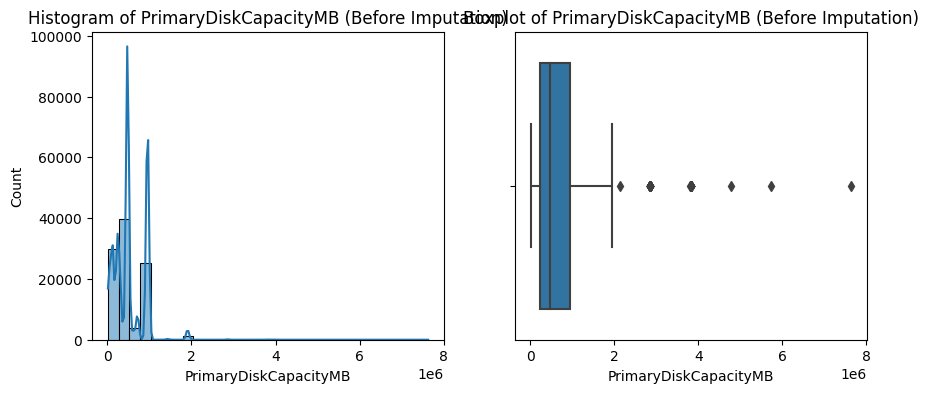

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


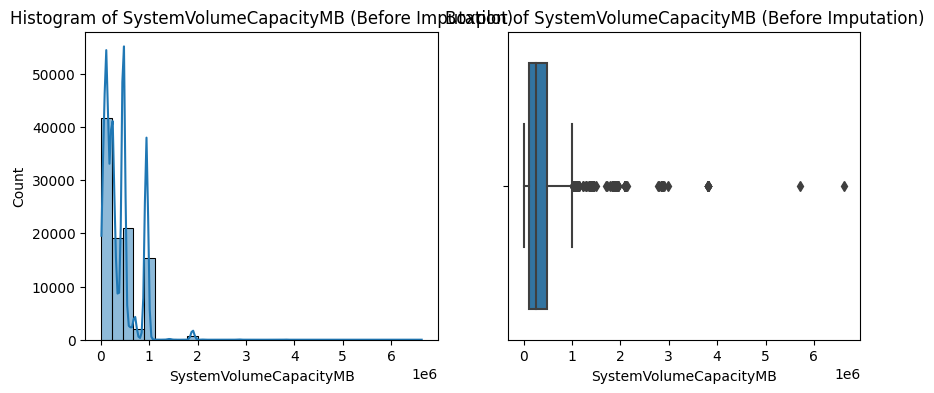

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


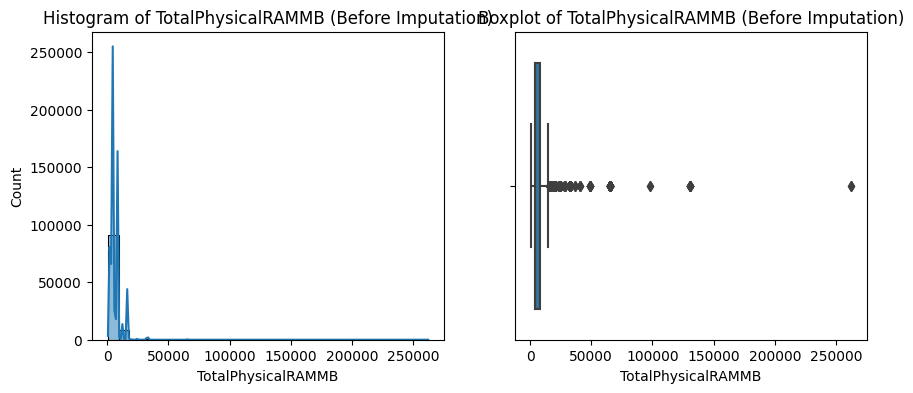

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


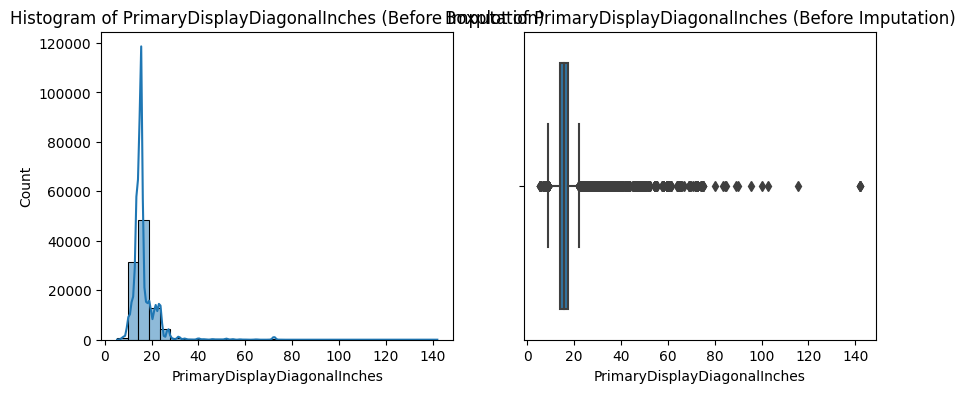

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


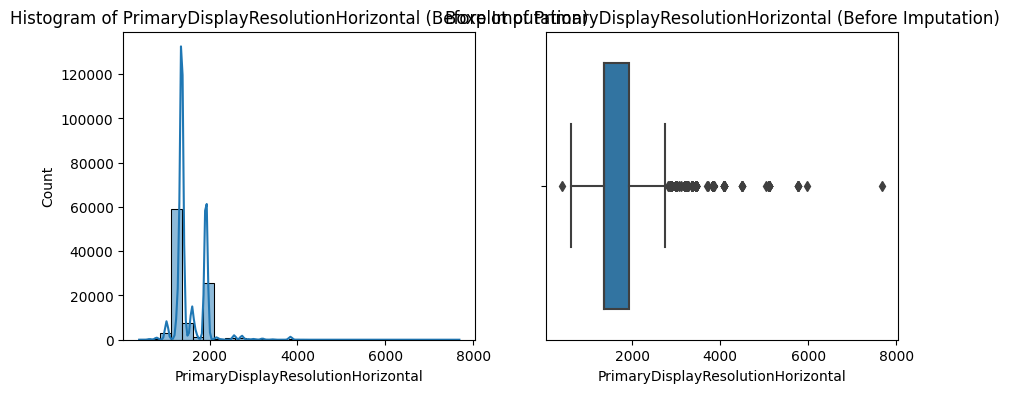

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


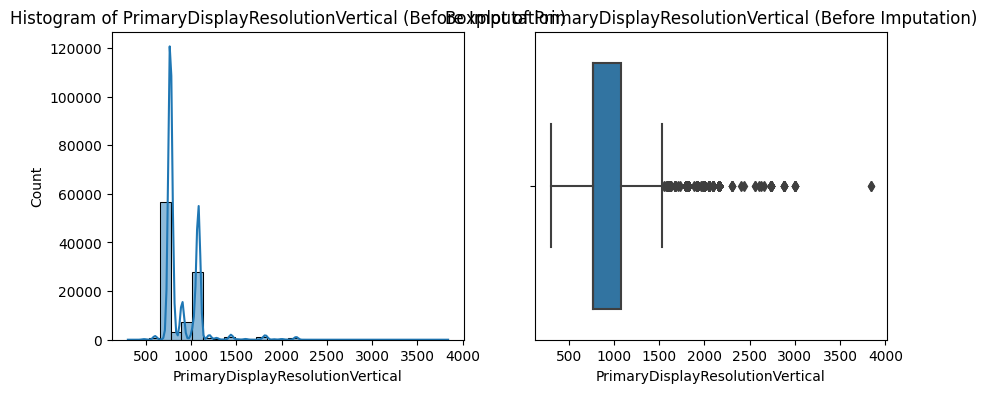

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


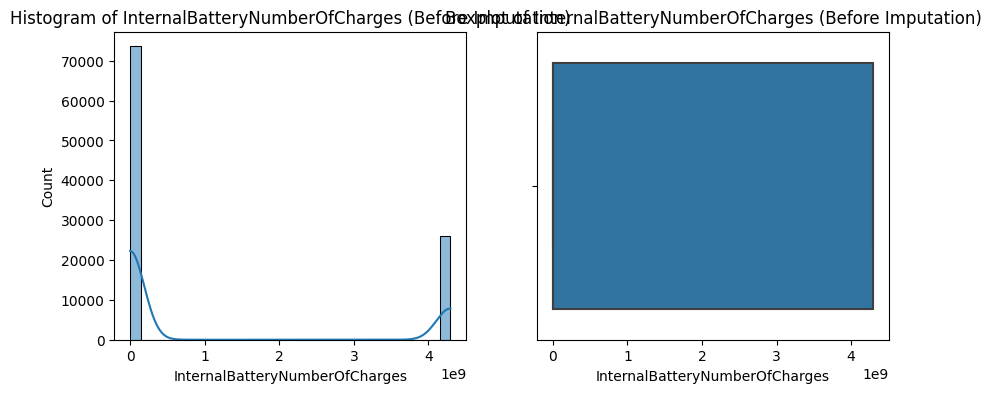

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


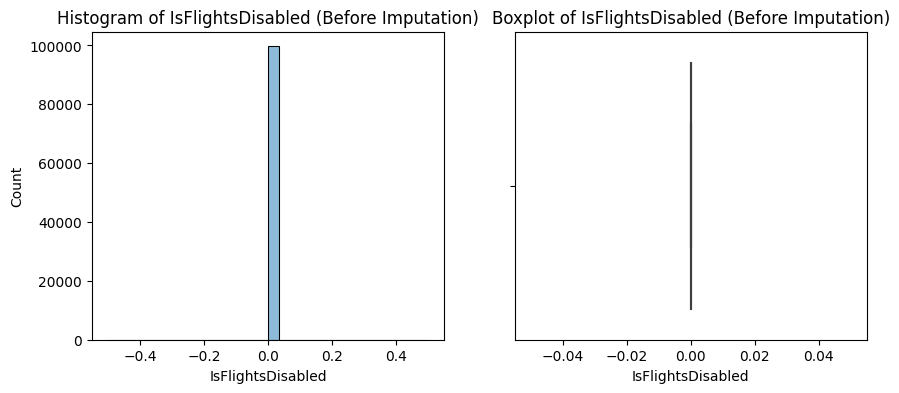

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


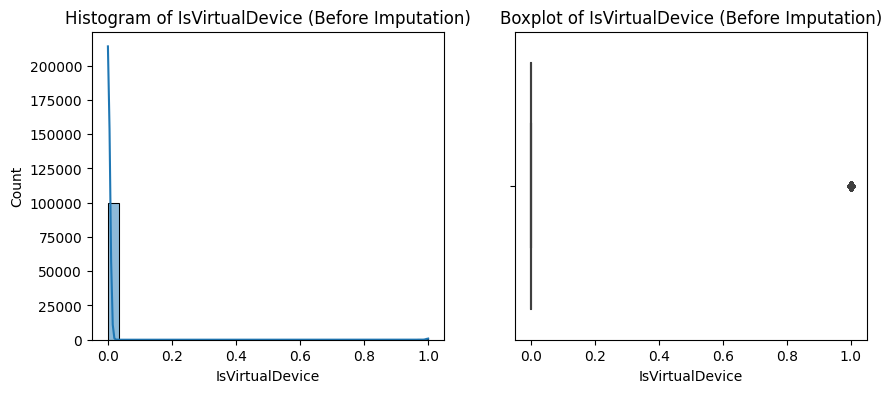

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


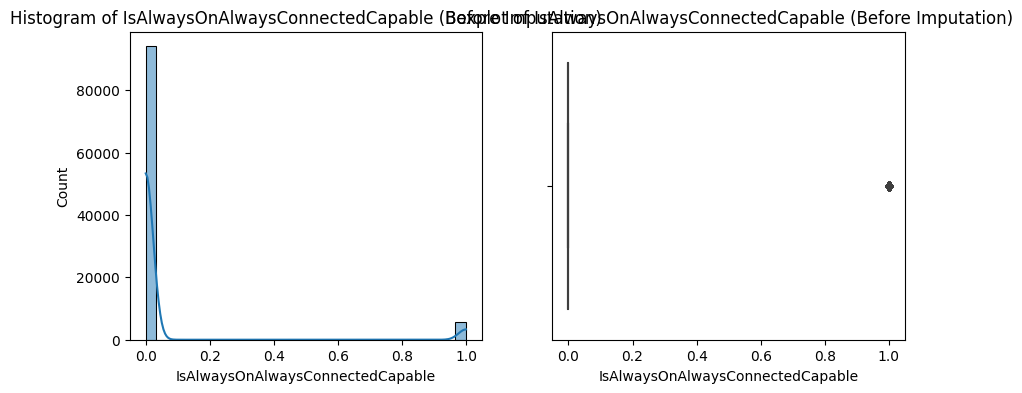

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


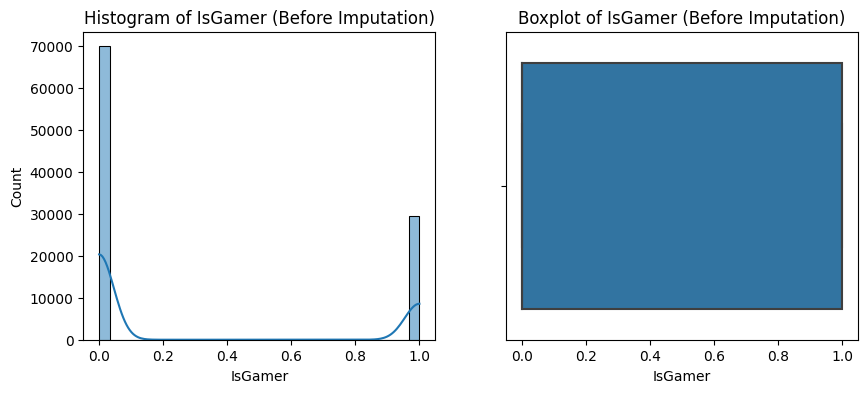

In [16]:
#distribution plots Before Imputation (For numeric Columns Only)
numeric_cols = train_df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    if train_df[col].isnull().sum() > 0: # Only plot if there are  missing values
        plt.figure(figsize=(10,4))
        #histogram
        plt.subplot(1,2,1)
        sns.histplot(train_df[col], kde=True, bins=30)
        plt.title(f"Histogram of {col} (Before Imputation)")

        #BoxPlot
        plt.subplot(1,2,2)
        sns.boxplot(x=train_df[col])
        plt.title(f"Boxplot of {col} (Before Imputation)")

        plt.show()

In [96]:

#Copy dataset to aviod modifying original
imputed_df = train_df.copy()

#Impute Numerical Columns
numeric_cols =imputed_df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if imputed_df[col].isnull().sum() > 0:
        #use median if the data is skewed , otherwise mean
        median = imputed_df[col].median()
        mean = imputed_df[col].mean()
        imputed_df[col].fillna(median, inplace=True) #using median by default


#Imputed Categorical Columns
categorical_cols = imputed_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if imputed_df[col].isnull().sum()>0:
        mode_value = imputed_df[col].mode()[0] #get most frequent value
        imputed_df[col].fillna(mode_value, inplace=True)
print("Missin values imputed successfully!!!!!!")

Missin values imputed successfully!!!!!!


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


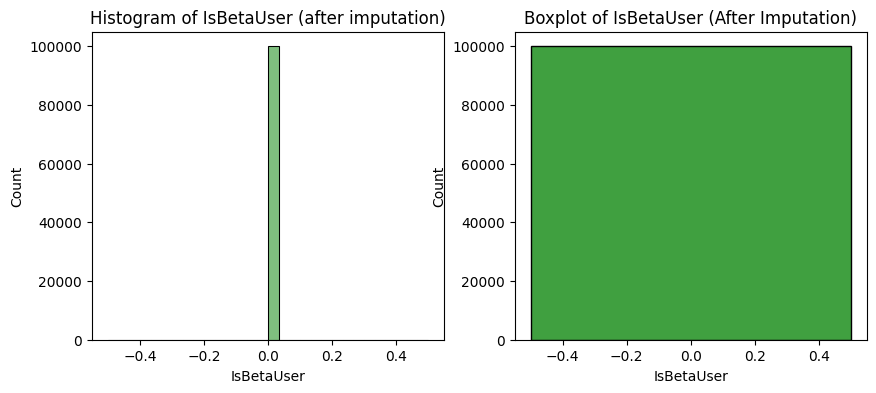

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


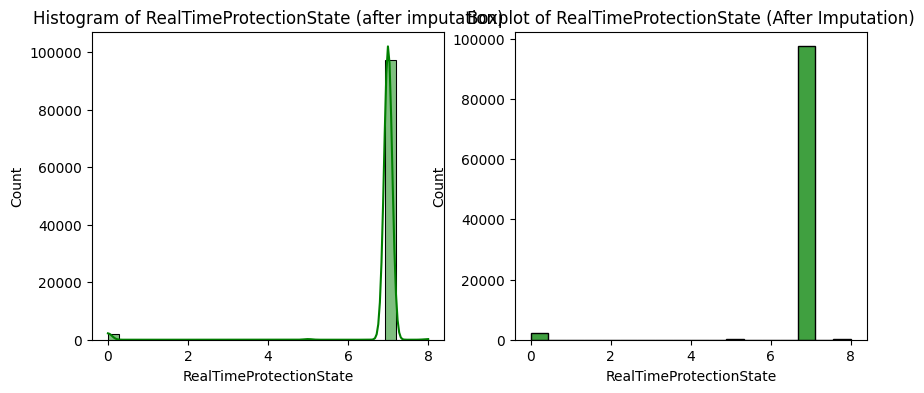

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


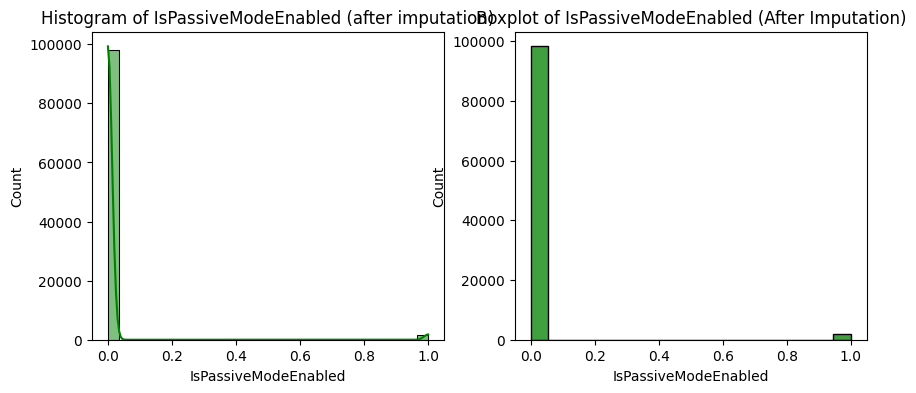

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


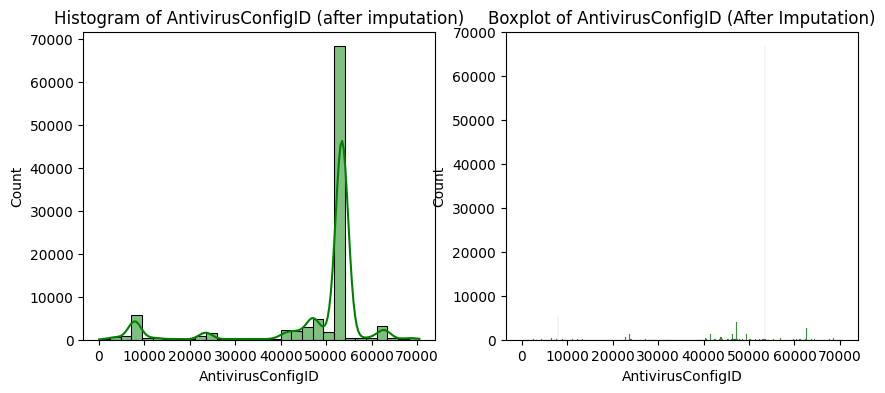

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


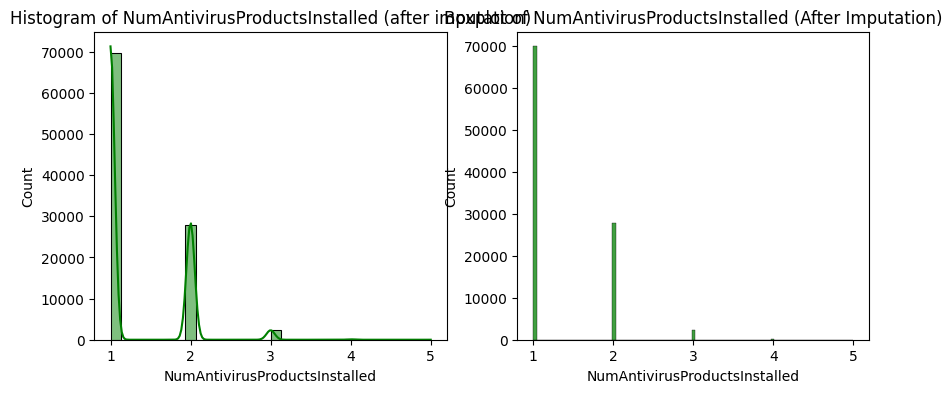

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


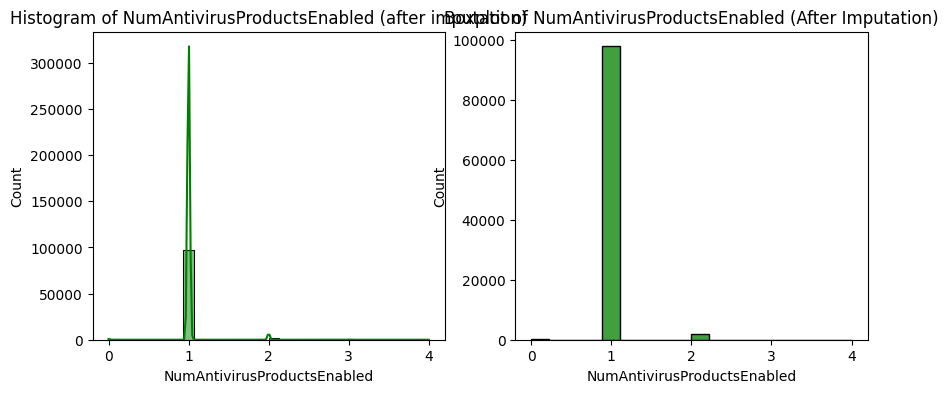

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


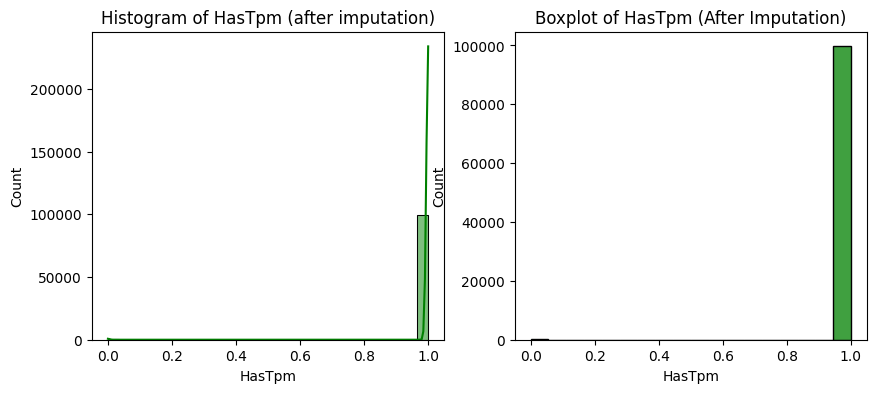

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


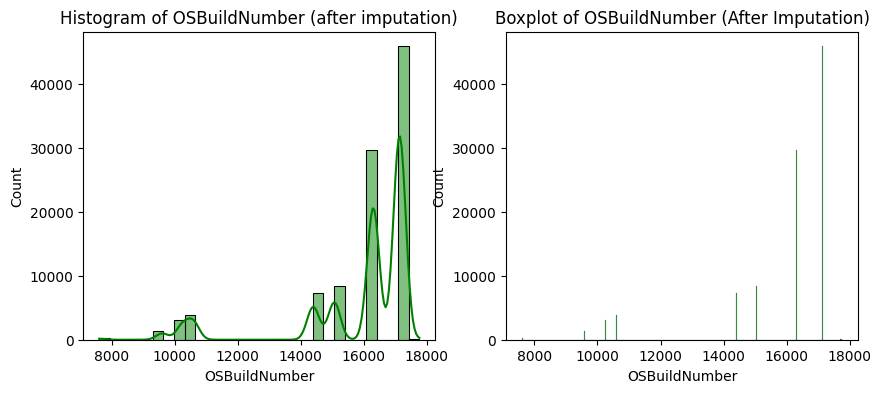

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


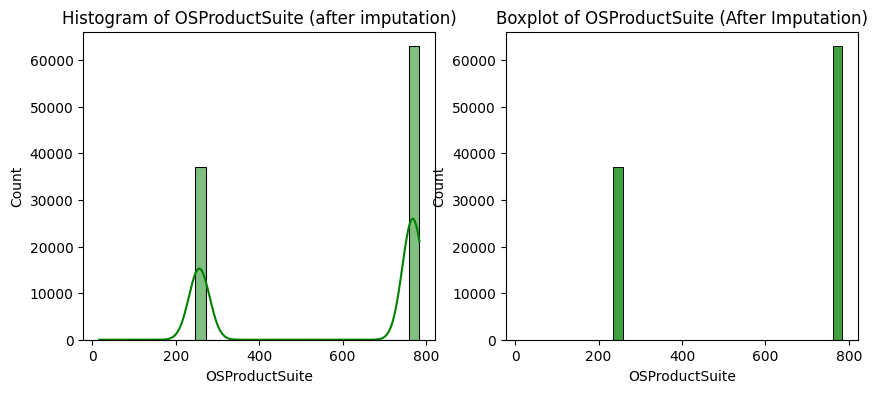

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


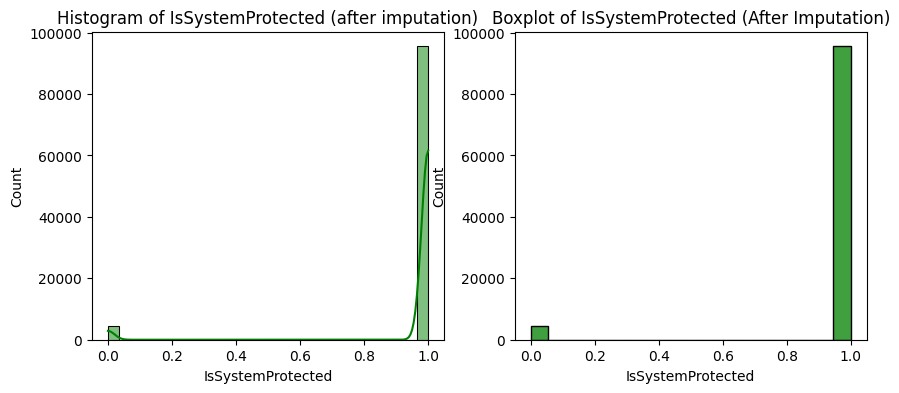

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


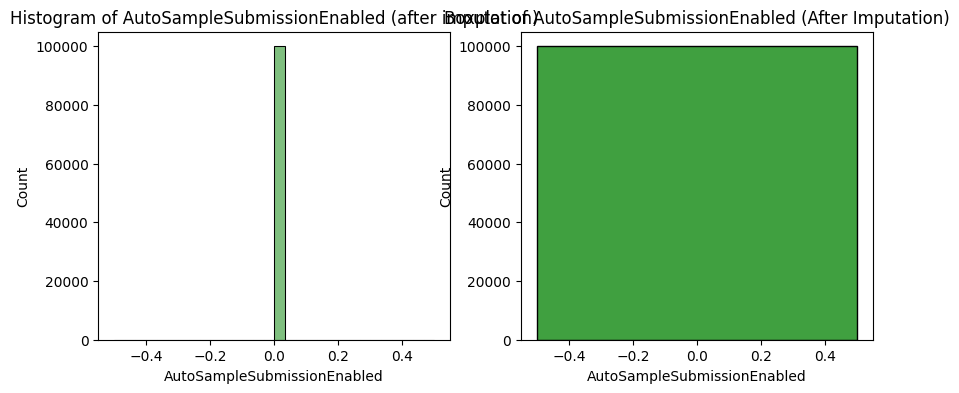

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


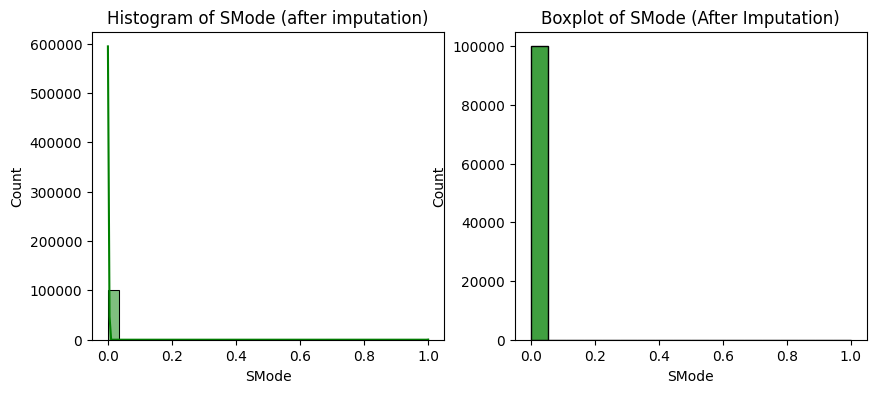

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


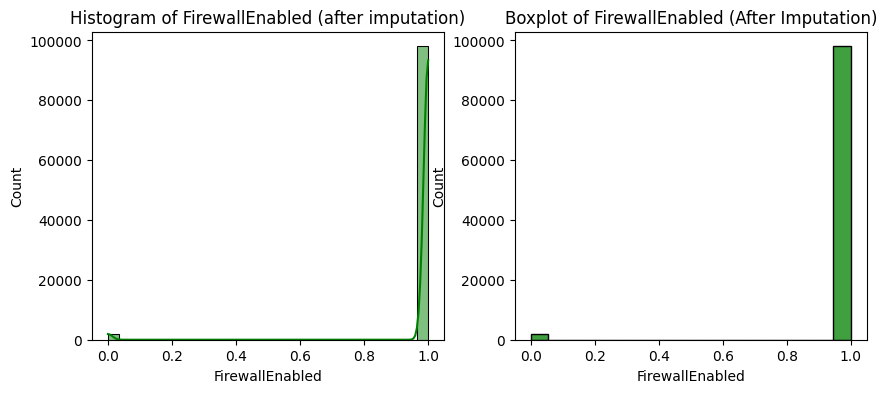

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


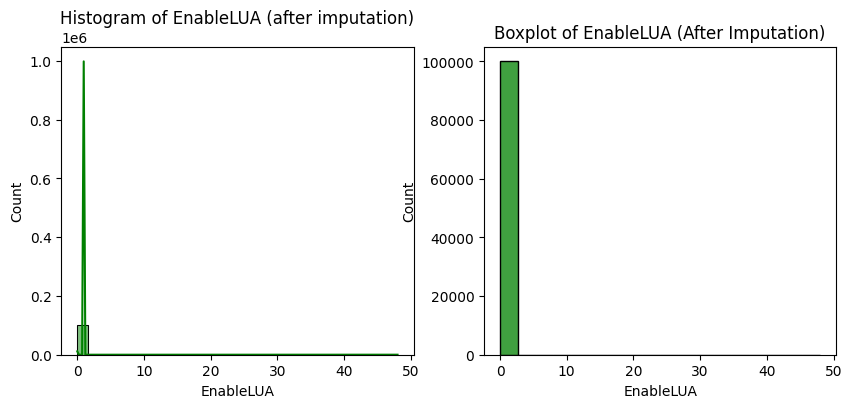

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


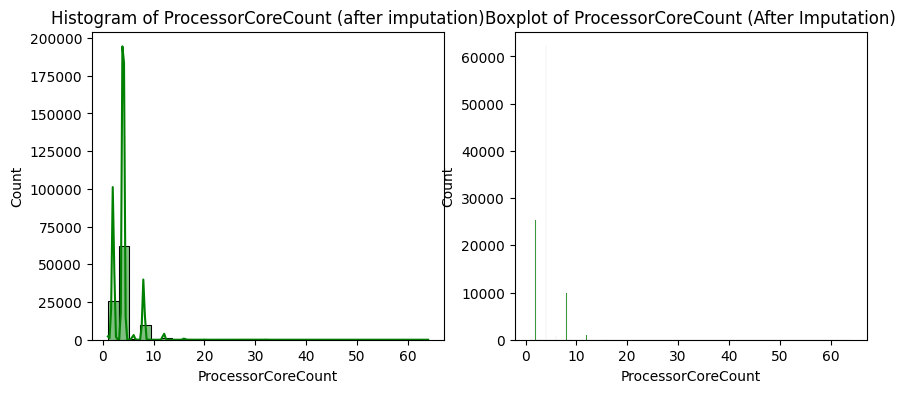

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


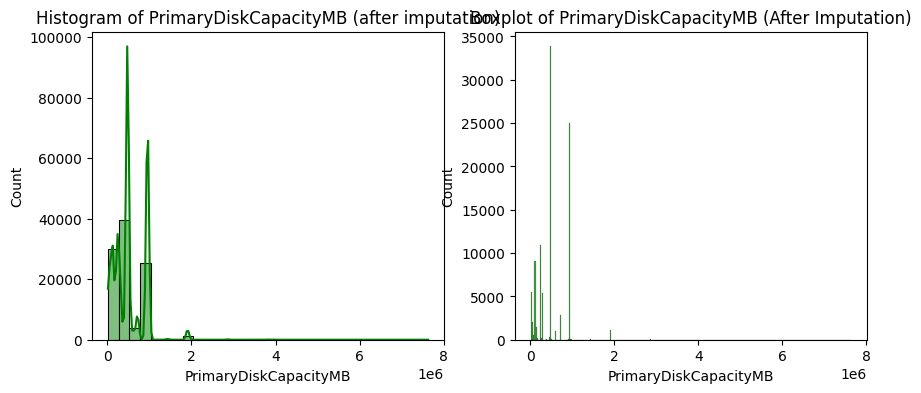

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


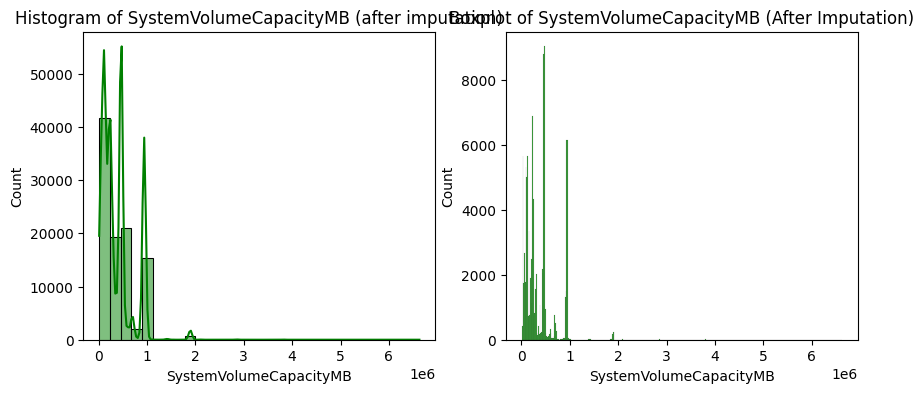

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


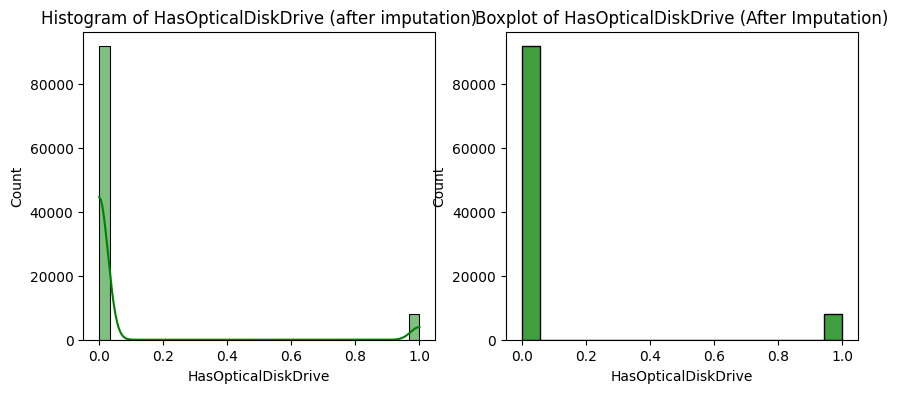

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


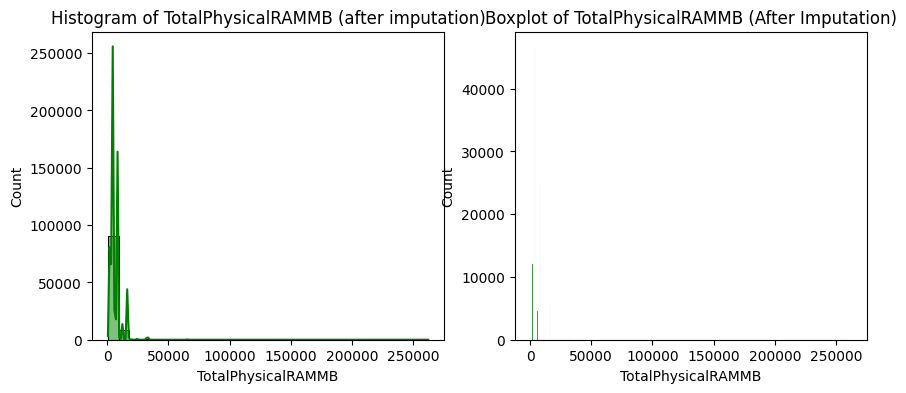

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


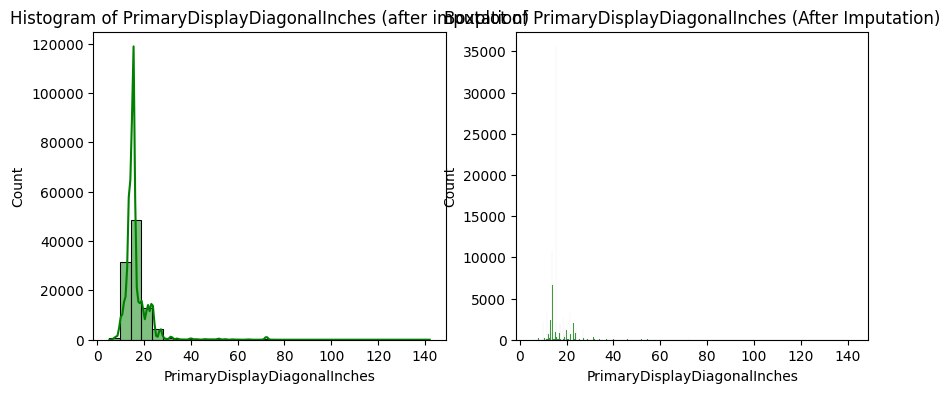

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


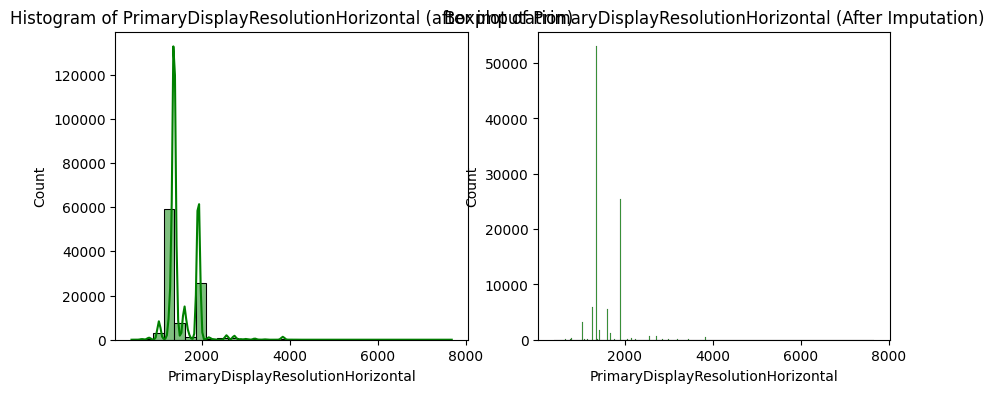

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


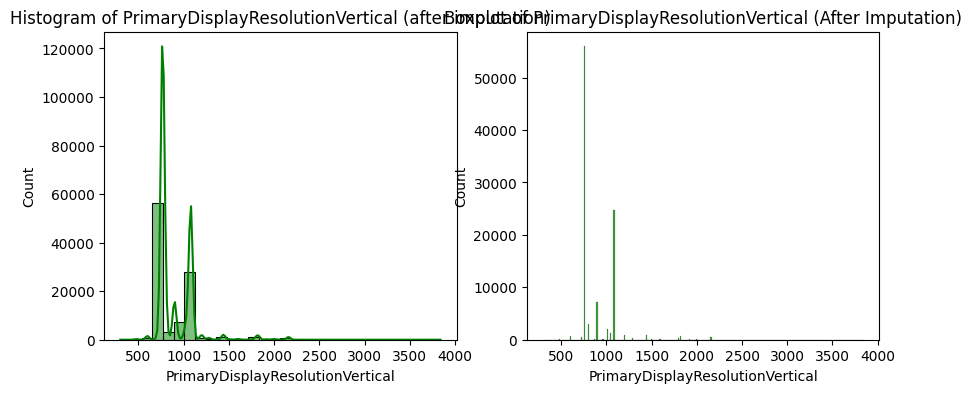

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


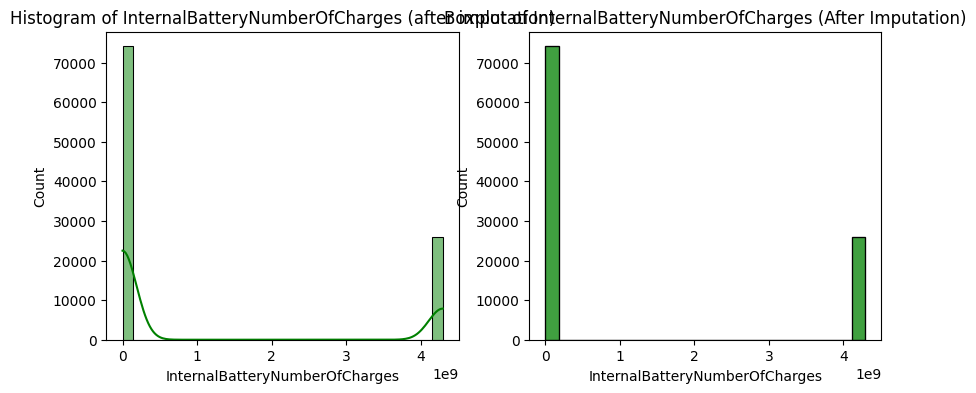

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


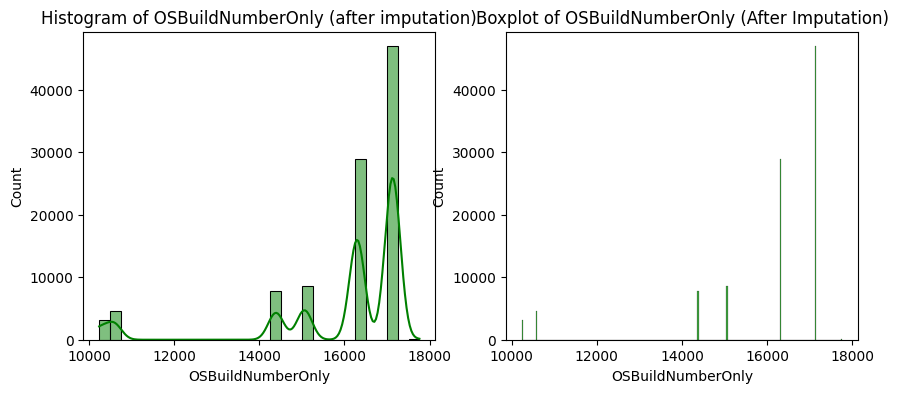

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


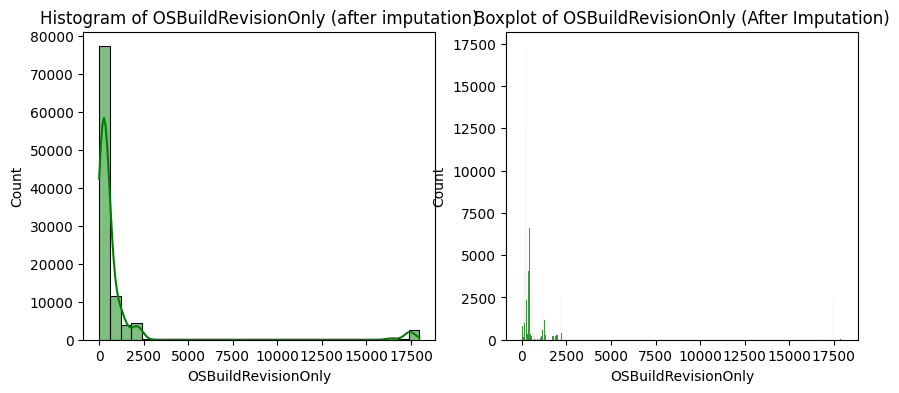

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


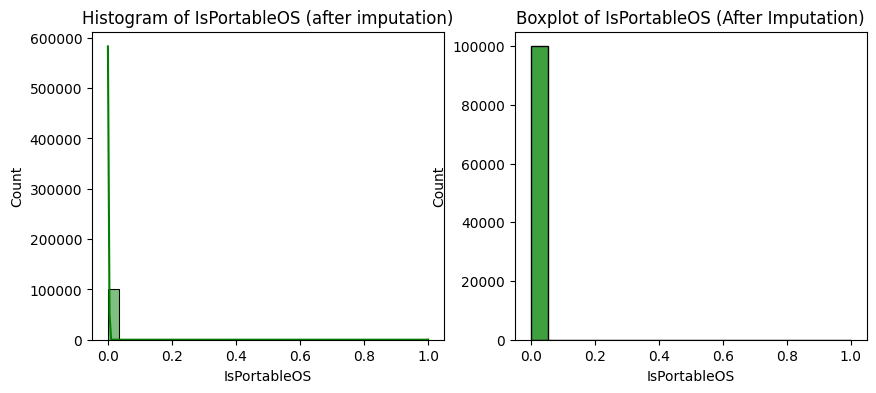

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


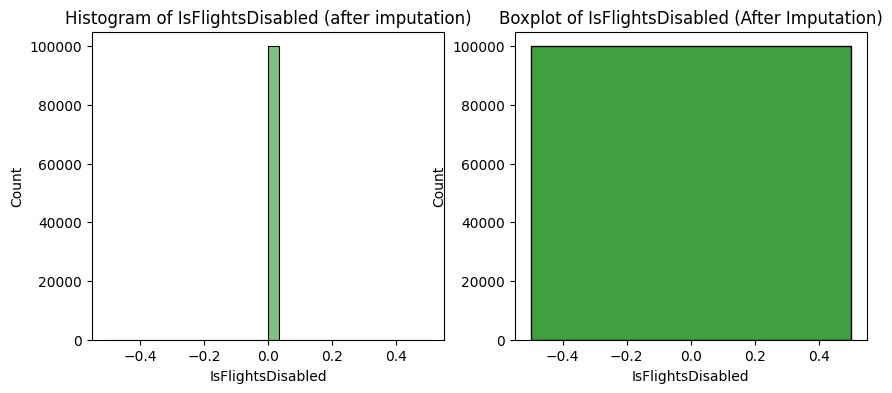

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


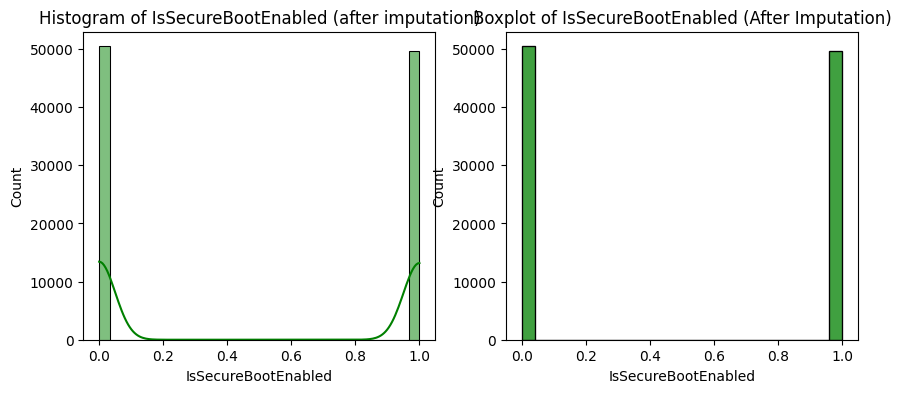

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


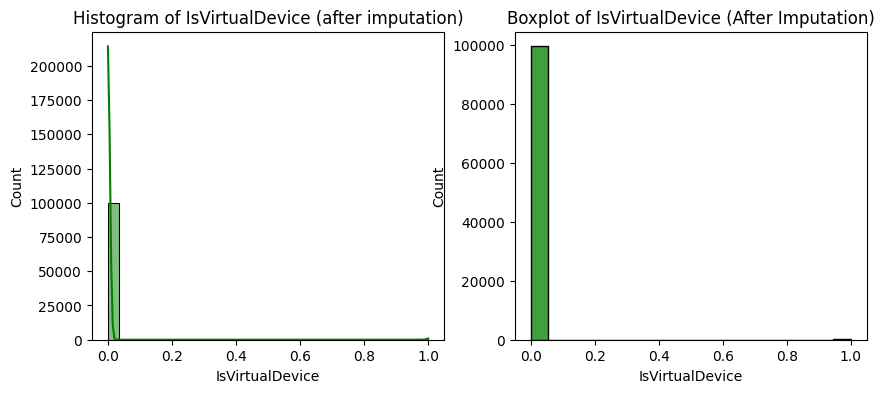

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


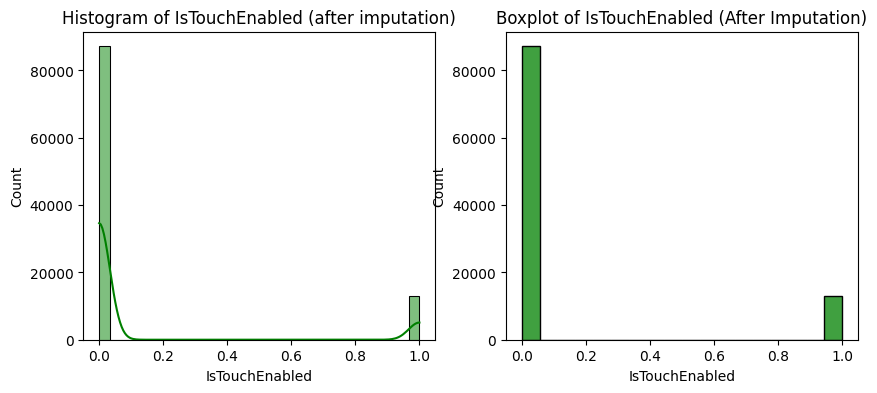

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


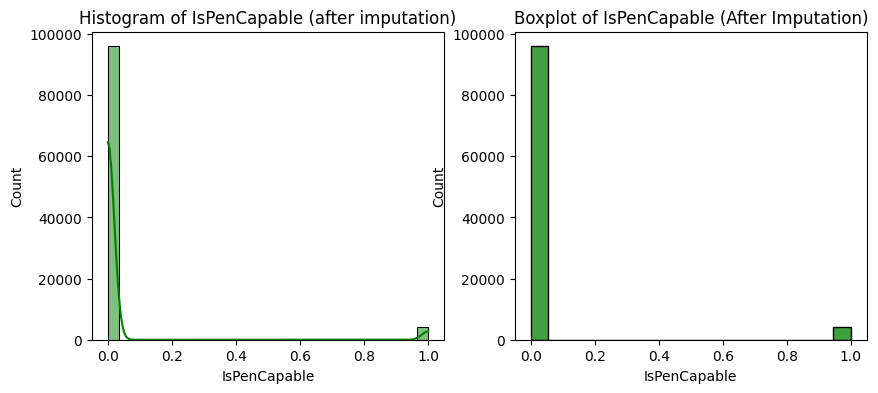

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


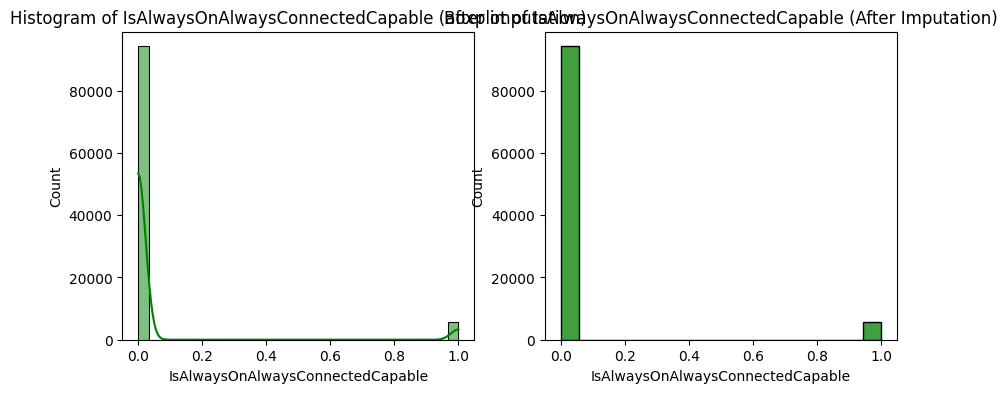

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


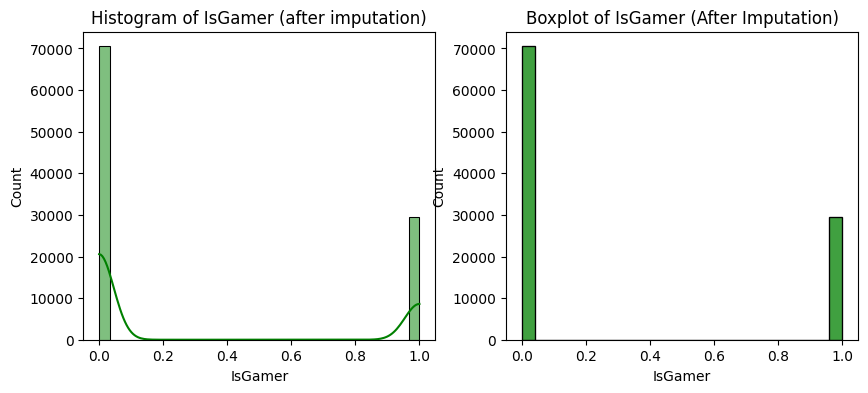

In [18]:
#distributed plots after imputation (numeric columns only)
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    #histogram
    plt.subplot(1,2,1)
    sns.histplot(imputed_df[col], kde=True, bins=30, color='green')
    plt.title(f"Histogram of {col} (after imputation)")

    #Boxplot
    plt.subplot(1,2,2)
    sns.histplot(x=imputed_df[col] , color='green')
    plt.title(f"Boxplot of {col} (After Imputation)")
    plt.show()


In [19]:
# Checking the class distribution
print(train_df['target'].value_counts(normalize=True)) # Get percentage
#Since the proportion of 1s (50.52%) and 0s (49.48%) is nearly equal, the dataset is balanced.

target
1    0.50525
0    0.49475
Name: proportion, dtype: float64


# Feature Relationships (Bivariate Analysis)
#Goal: Understand how independent variables relate to the target variable.
#Numerical Features vs Target
#Scatter Plots: Identify trends between numerical features and targe
numeric_features = train_df.select_dtypes(include=['number']).columns

for col in numeric_features:
    if col != 'target':  # Skip target itself
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=train_df[col], y=train_df['target'])
        plt.title(f"Scatter Plot: {col} vs Target")
        plt.show()

If your scatter plot shows an equal distribution of 0s and 1s across the feature space, it means:

The feature is important → It provides meaningful separation between classes.
It contributes to classification → The model can use this feature to distinguish between 0 and 1.
Keep the feature unless it's highly correlated with another (which would cause redundancy).

In [20]:
train_df['target']

0        0
1        1
2        1
3        1
4        0
        ..
99995    0
99996    0
99997    1
99998    0
99999    0
Name: target, Length: 100000, dtype: object

In [21]:
from sklearn.impute import SimpleImputer

# Step 1: Select numeric columns
numeric_cols = train_df.select_dtypes(include=['number']).columns

# Step 2: Apply mean imputation (or use median for skewed data)
imputer = SimpleImputer(strategy='mean')  
train_df[numeric_cols] = imputer.fit_transform(train_df[numeric_cols])

In [22]:
# 2️Impute categorical columns with mode (most frequent value)
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)  # Fill with mode

In [23]:
train_df.isnull().sum()

MachineID           0
ProductName         0
EngineVersion       0
AppVersion          0
SignatureVersion    0
                   ..
IsGamer             0
RegionIdentifier    0
DateAS              0
DateOS              0
target              0
Length: 76, dtype: int64

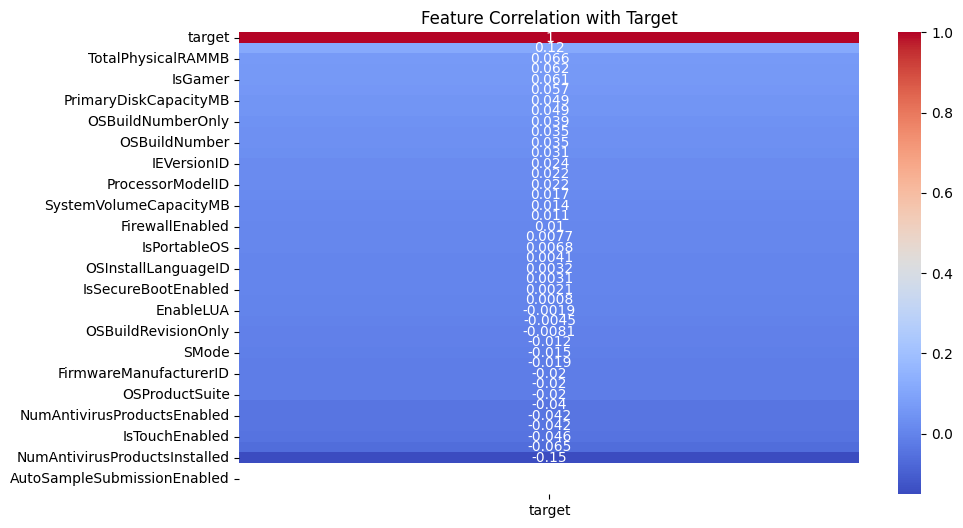

In [24]:
#Correlation Matrix: Shows how strongly features are related to the target.
# Convert target column to numeric
train_df['target'] = train_df['target'].astype(int)

# Select only numeric columns
numeric_df = train_df.select_dtypes(include=['number'])

# Compute correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr()[['target']].sort_values(by='target', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Target")
plt.show()

Correlation Matrix for Numerical Features:


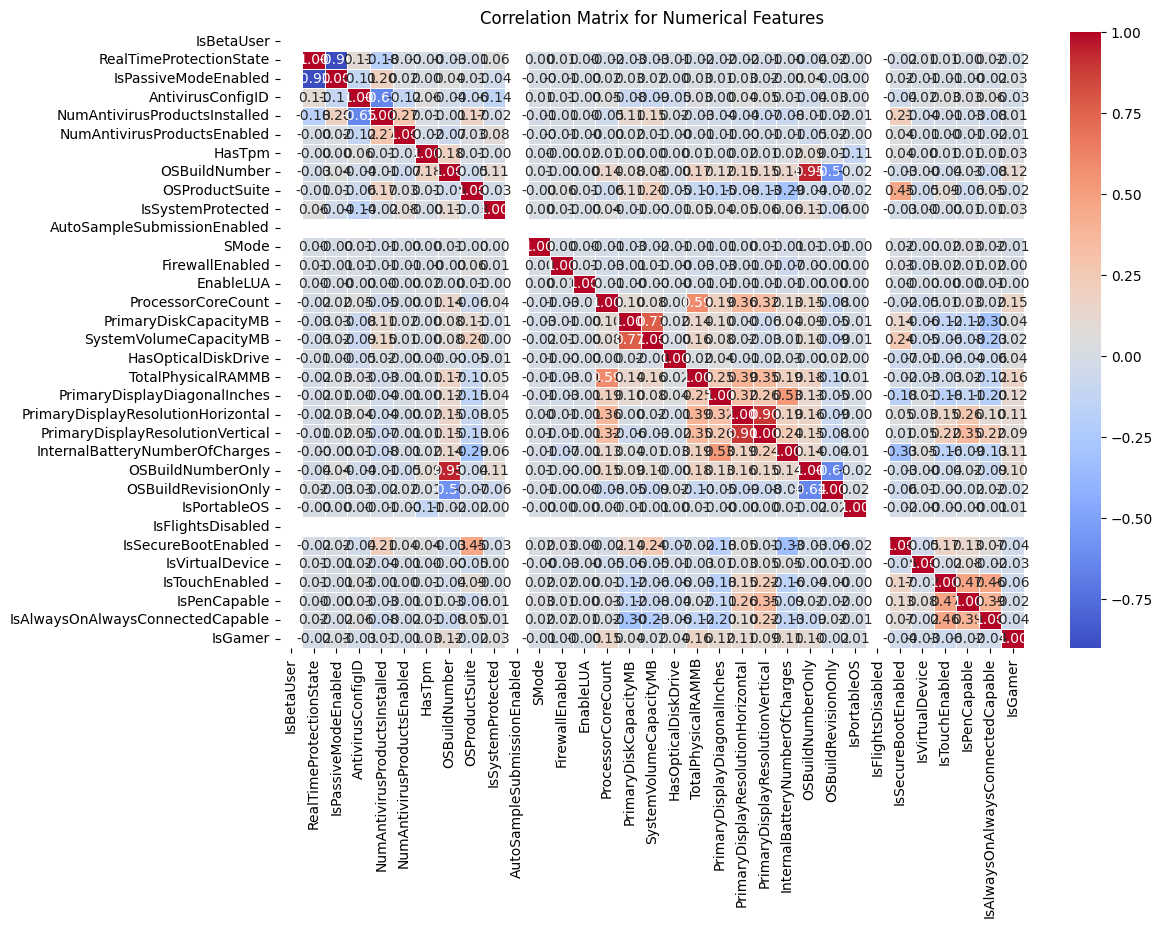

Highly Correlated Pairs (Correlation > 0.7):
IsPassiveModeEnabled and RealTimeProtectionState: Correlation = -0.90
SystemVolumeCapacityMB and PrimaryDiskCapacityMB: Correlation = 0.77
PrimaryDisplayResolutionVertical and PrimaryDisplayResolutionHorizontal: Correlation = 0.90
OSBuildNumberOnly and OSBuildNumber: Correlation = 0.95


In [5]:
from scipy.stats import chi2_contingency

# Separate numerical and categorical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns

# --- 1. Correlation Matrix for Numerical Features ---
print("Correlation Matrix for Numerical Features:")
correlation_matrix = train_df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

# Identify highly correlated pairs (threshold = 0.7)
threshold = 0.7
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append(
                (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            )

print("Highly Correlated Pairs (Correlation > 0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.2f}")



In [26]:
# Select only numerical columns
numerical_features = train_df.select_dtypes(include=['number']).columns

# Compute absolute correlation with target
target_corr = train_df[numerical_features].corr()['target'].abs()

# Set threshold
threshold = 0.3

# Find low-correlation numerical features
low_corr_features = target_corr[target_corr < threshold].index.tolist()

print(f"Numerical features with correlation < {threshold} with target:")
print(low_corr_features)
print(len(low_corr_features))

Numerical features with correlation < 0.3 with target:
['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'CityID', 'OSBuildNumber', 'OSProductSuite', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'IsPortableOS', 'FirmwareManufacturerID', 'FirmwareVersionID', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier']
40


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numeric features
X = train_df.select_dtypes(include=['number']).drop(columns=['target'])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF value
print(vif_data.sort_values(by="VIF", ascending=False))

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                               Feature        VIF
29                   OSBuildNumberOnly  19.791446
8                        OSBuildNumber  18.063812
27    PrimaryDisplayResolutionVertical   6.570946
26  PrimaryDisplayResolutionHorizontal   6.139348
2                 IsPassiveModeEnabled   4.303616
1              RealTimeProtectionState   3.988927
20                    ProcessorModelID   3.424319
19             ProcessorManufacturerID   3.254832
22              SystemVolumeCapacityMB   2.835896
21               PrimaryDiskCapacityMB   2.690273
28      InternalBatteryNumberOfCharges   2.619687
13                         IEVersionID   2.297238
4        NumAntivirusProductsInstalled   2.063110
3                    AntivirusConfigID   1.802664
24                  TotalPhysicalRAMMB   1.758197
30                 OSBuildRevisionOnly   1.752506
40    IsAlwaysOnAlwaysConnectedCapable   1.708987
18                  ProcessorCoreCount   1.665283
25        PrimaryDisplayDiagonalInches   1.598917


# Features to drop based on high VIF and NaN VIF
drop_features = [
    "OSBuildNumberOnly", "OSBuildNumber",  # High multicollinearity (VIF > 10)
    "IsBetaUser", "AutoSampleSubmissionEnabled", "IsFlightsDisabled"  # NaN VIF (constant features)
]

In [28]:
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    print(f"{col}: {train_df[col].nunique()} unique values")

MachineID: 99835 unique values
ProductName: 2 unique values
EngineVersion: 37 unique values
AppVersion: 69 unique values
SignatureVersion: 2735 unique values
CountryID: 220 unique values
GeoRegionID: 239 unique values
LocaleEnglishNameID: 185 unique values
PlatformType: 4 unique values
Processor: 3 unique values
OSVersion: 7 unique values
OsPlatformSubRelease: 9 unique values
OSBuildLab: 281 unique values
SKUEditionName: 8 unique values
MDC2FormFactor: 11 unique values
DeviceFamily: 2 unique values
PrimaryDiskType: 4 unique values
ChassisType: 28 unique values
PowerPlatformRole: 9 unique values
NumericOSVersion: 221 unique values
OSArchitecture: 3 unique values
OSBranch: 13 unique values
OSEdition: 20 unique values
OSSkuFriendlyName: 18 unique values
OSInstallType: 9 unique values
OSUILocaleID: 64 unique values
AutoUpdateOptionsName: 6 unique values
OSGenuineState: 4 unique values
LicenseActivationChannel: 6 unique values
FlightRing: 7 unique values
DateAS: 2695 unique values
DateOS: 1

In [29]:
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_features:
    print(f"{col}: {train_df[col].nunique()} unique values")


MachineID: 99835 unique values
ProductName: 2 unique values
EngineVersion: 37 unique values
AppVersion: 69 unique values
SignatureVersion: 2735 unique values
CountryID: 220 unique values
GeoRegionID: 239 unique values
LocaleEnglishNameID: 185 unique values
PlatformType: 4 unique values
Processor: 3 unique values
OSVersion: 7 unique values
OsPlatformSubRelease: 9 unique values
OSBuildLab: 281 unique values
SKUEditionName: 8 unique values
MDC2FormFactor: 11 unique values
DeviceFamily: 2 unique values
PrimaryDiskType: 4 unique values
ChassisType: 28 unique values
PowerPlatformRole: 9 unique values
NumericOSVersion: 221 unique values
OSArchitecture: 3 unique values
OSBranch: 13 unique values
OSEdition: 20 unique values
OSSkuFriendlyName: 18 unique values
OSInstallType: 9 unique values
OSUILocaleID: 64 unique values
AutoUpdateOptionsName: 6 unique values
OSGenuineState: 4 unique values
LicenseActivationChannel: 6 unique values
FlightRing: 7 unique values
DateAS: 2695 unique values
DateOS: 1

In [30]:
for col in categorical_features:
    print(f"\nValue counts for {col}:")
    print(train_df[col].value_counts(normalize=True)[:10])  # Show top 10 categories



Value counts for MachineID:
MachineID
8e0523438a5ca48323f50b2c47f6d31a    0.00002
0ca2c7ebe3921b5e74d8a030646ee9c2    0.00002
43628a7db99daf5bf8ca8a3f36058ea4    0.00002
bb11a6869fb4ec76797e97ae3006c833    0.00002
a5f52a788ea2e509572369585ddd05c9    0.00002
43b9a5c742bb17be4ff00b49b75982a7    0.00002
61b206f9b0964a5fc2f0ff3ce2e5936a    0.00002
4d9f38ec7d592c7239758613b3c514be    0.00002
cac901f6e1e56b15b86ca5a8c4d813f3    0.00002
2f1e860f4f5bbd1867e8c4c2c41da683    0.00002
Name: proportion, dtype: float64

Value counts for ProductName:
ProductName
win8defender    0.99771
mse             0.00229
Name: proportion, dtype: float64

Value counts for EngineVersion:
EngineVersion
1.1.15200.1    0.45219
1.1.15100.1    0.44017
1.1.15000.2    0.03169
1.1.14901.4    0.02597
1.1.14800.3    0.01719
1.1.15300.6    0.00650
1.1.14700.5    0.00593
1.1.14600.4    0.00569
1.1.14104.0    0.00328
1.1.15300.5    0.00255
Name: proportion, dtype: float64

Value counts for AppVersion:
AppVersion
4.18.1807.180

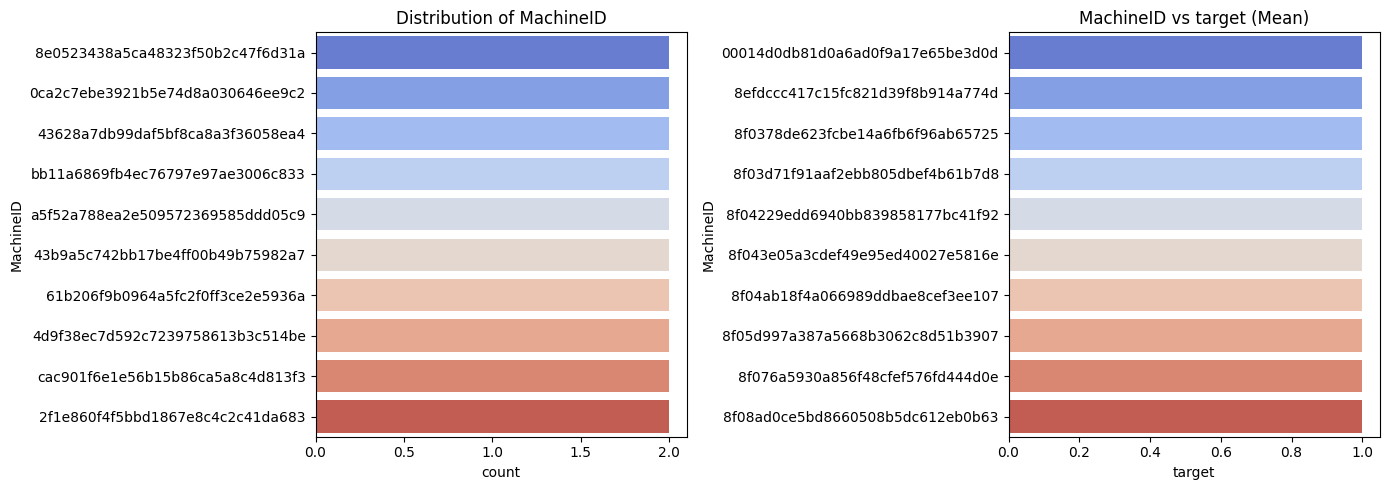

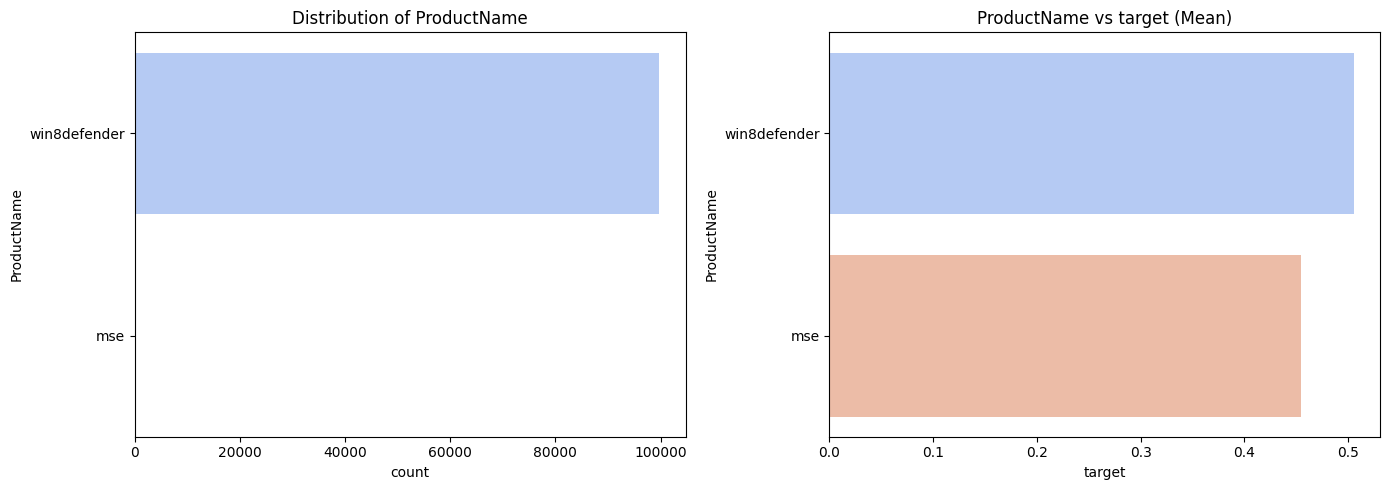

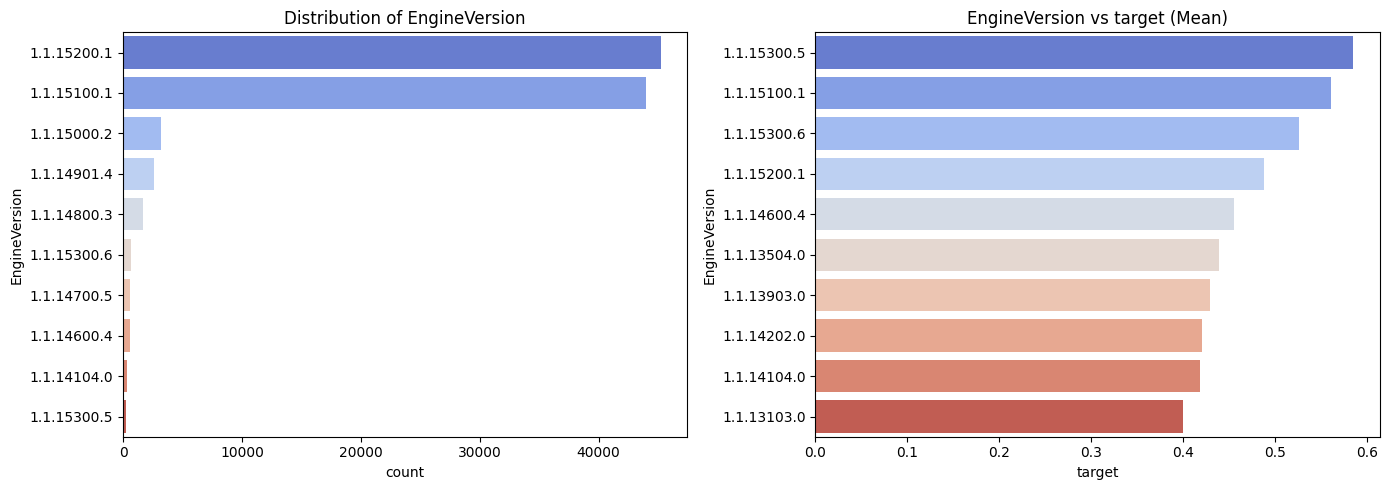

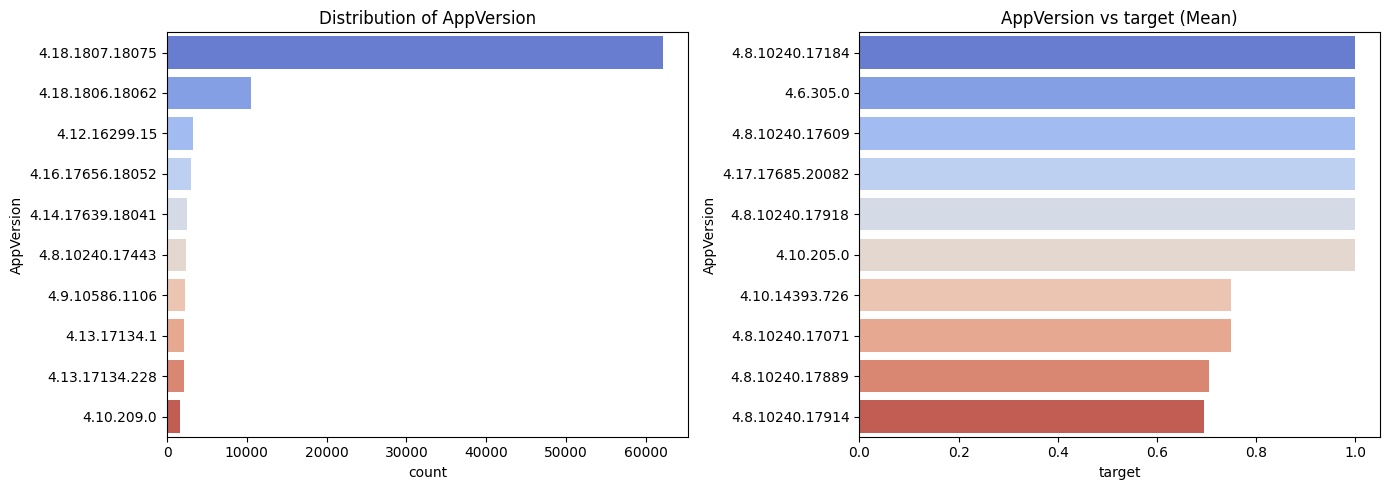

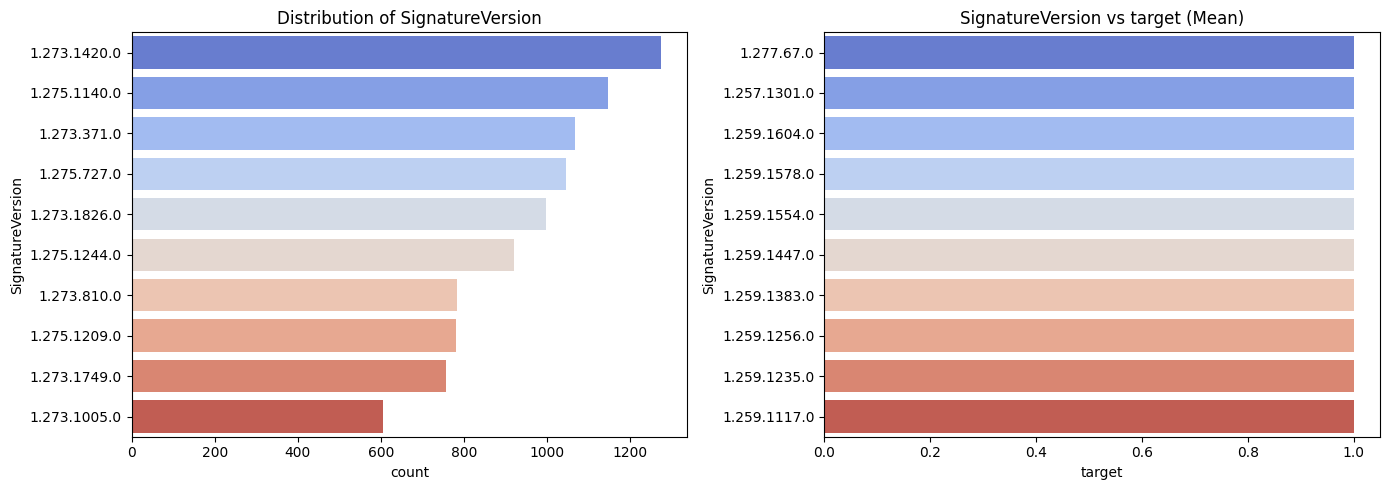

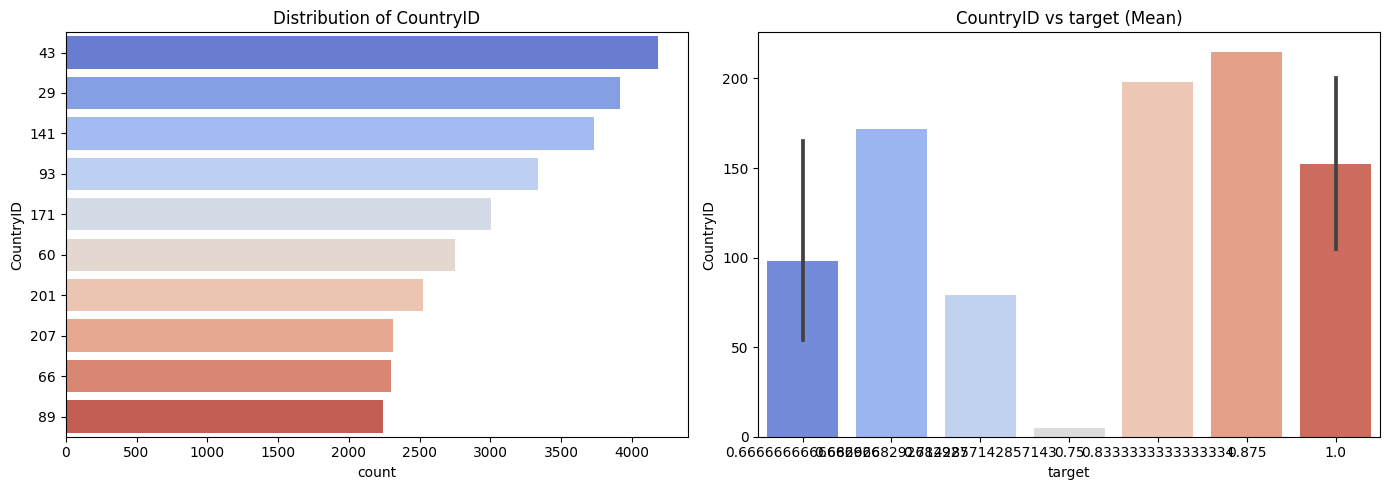

<ipython-input-31-a555e7235b94>:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  category_target_mean = df.groupby(col)[target_col].mean().sort_values(ascending=False)[:top_n]


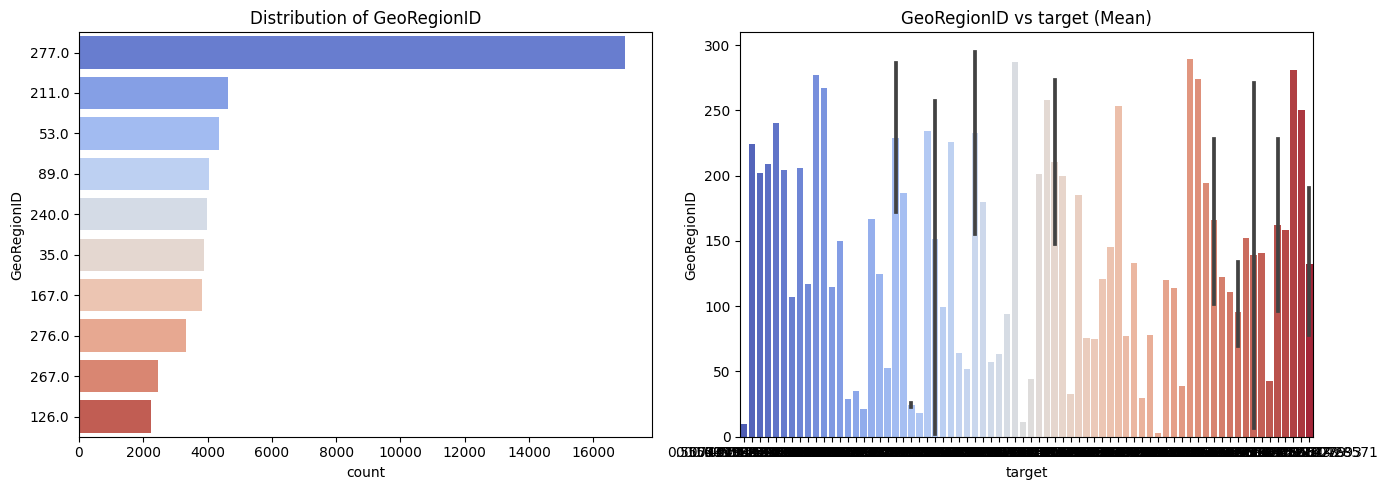

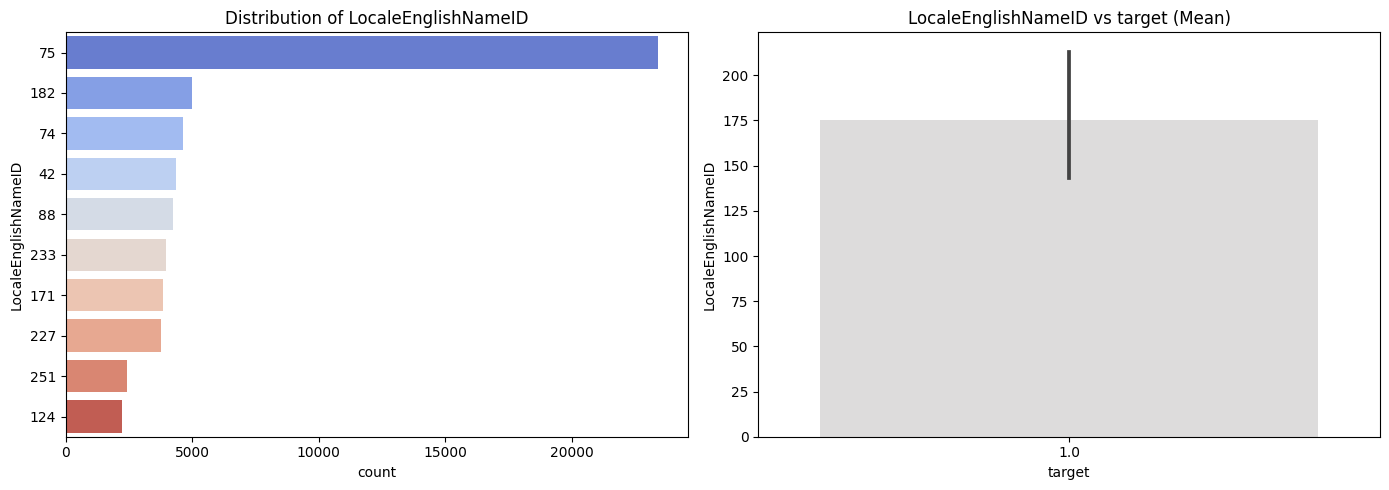

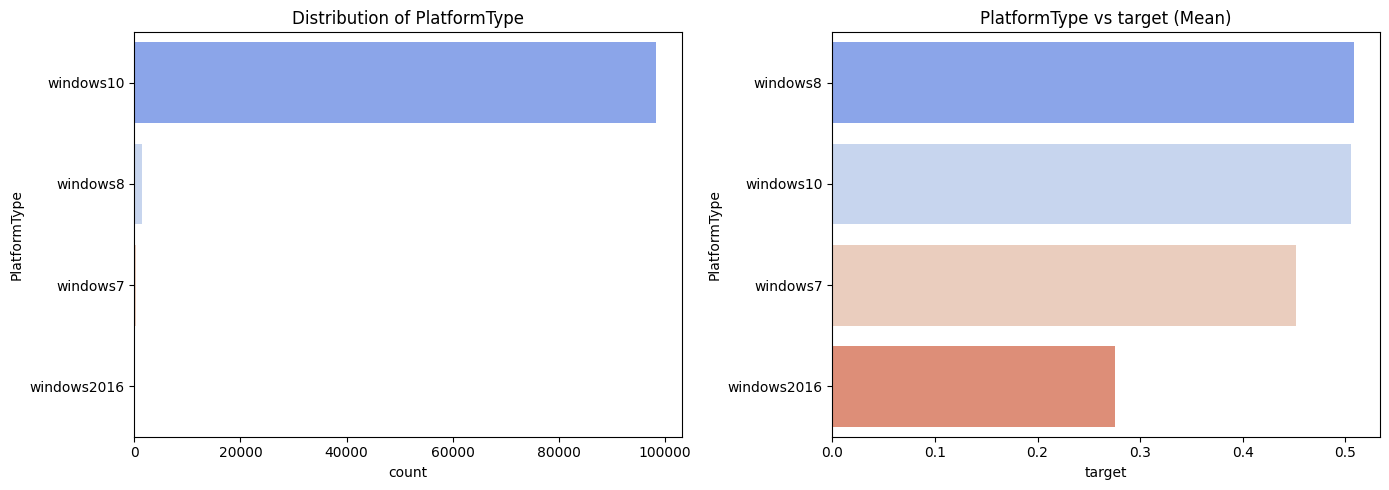

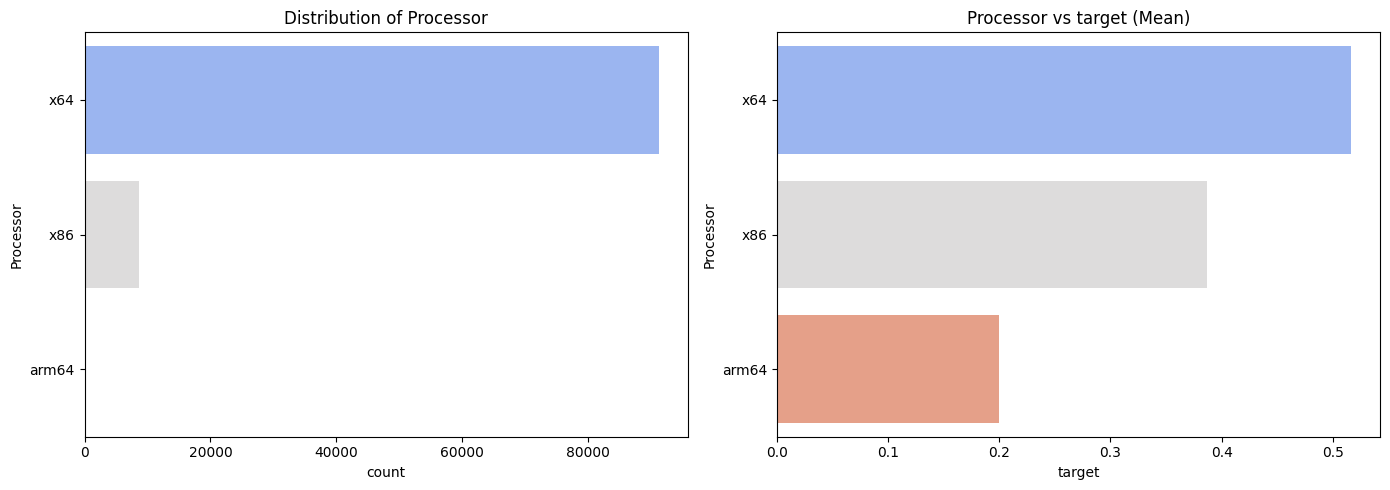

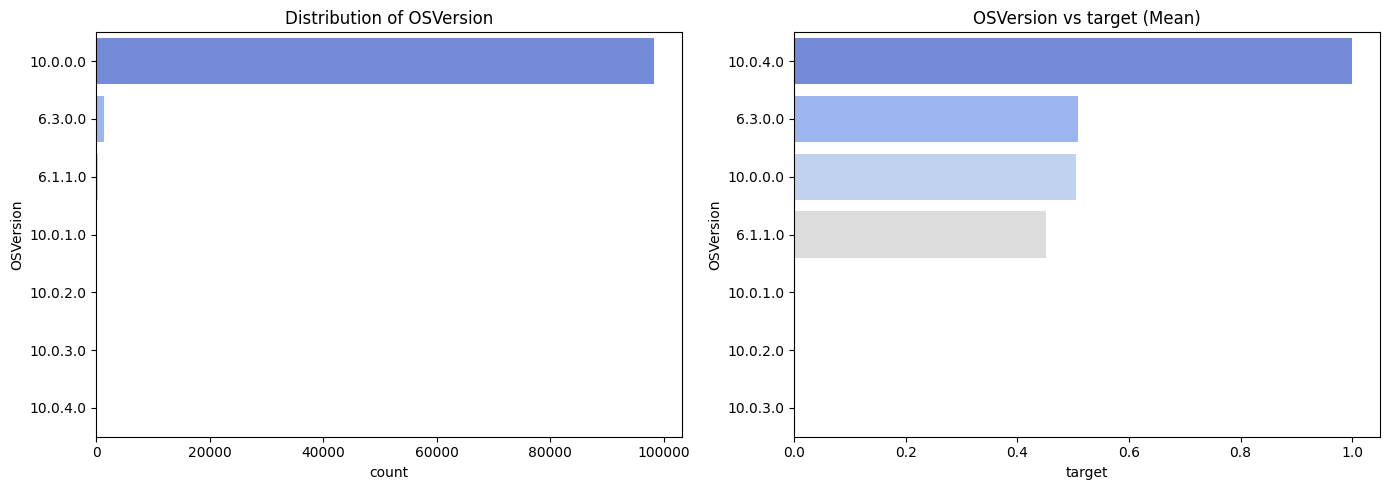

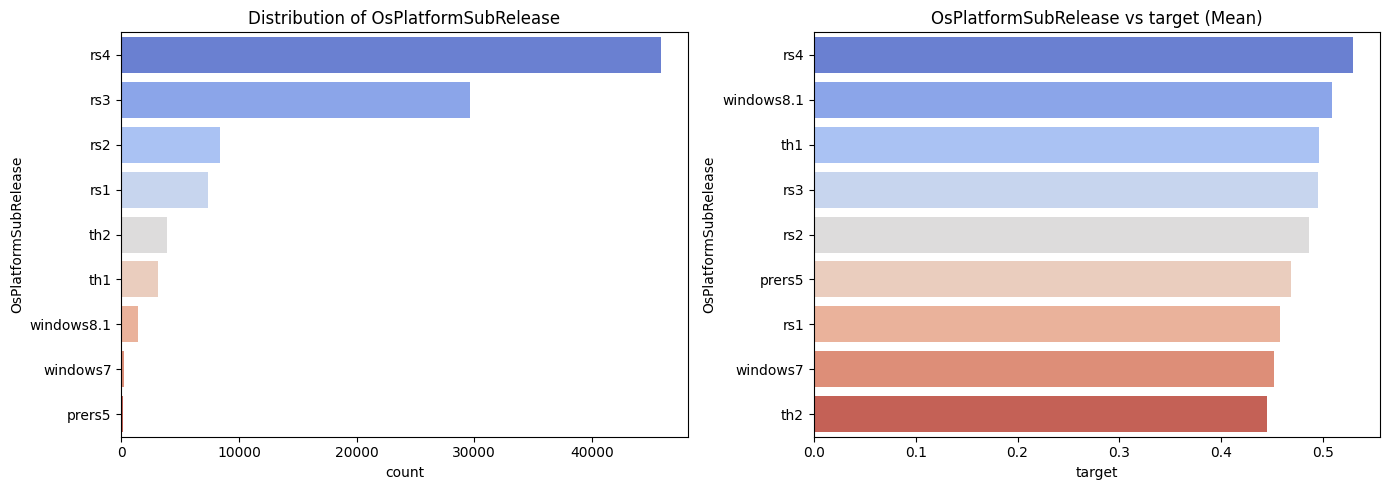

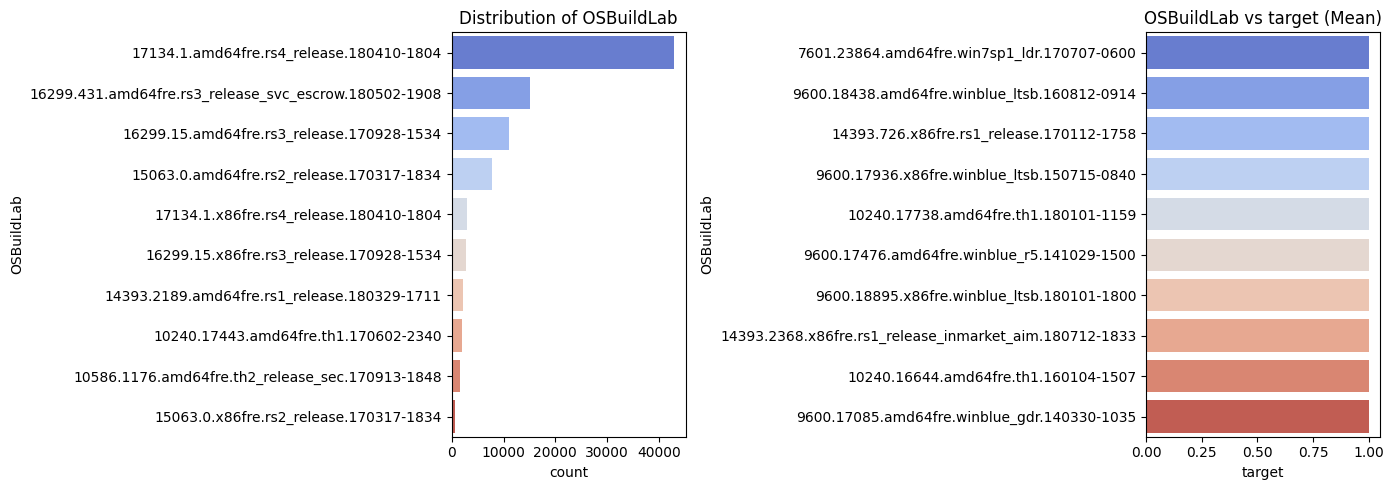

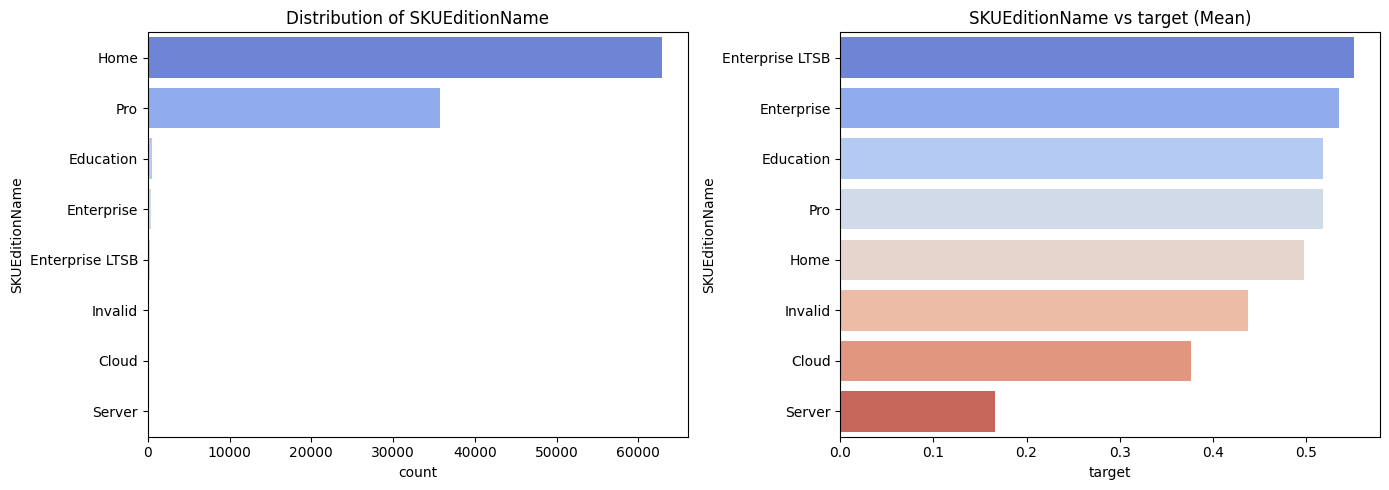

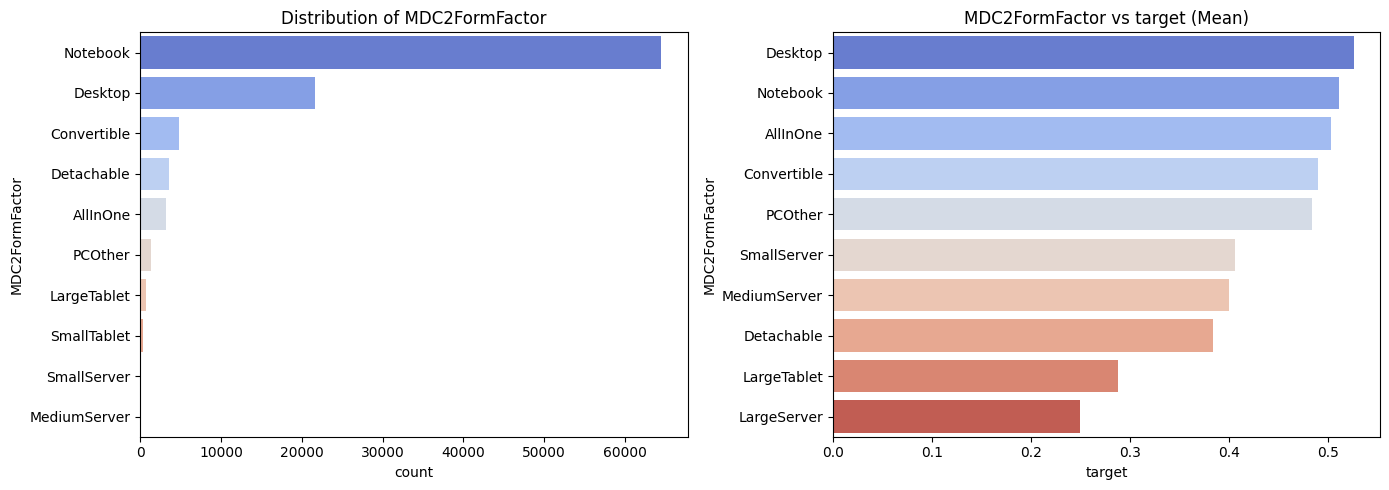

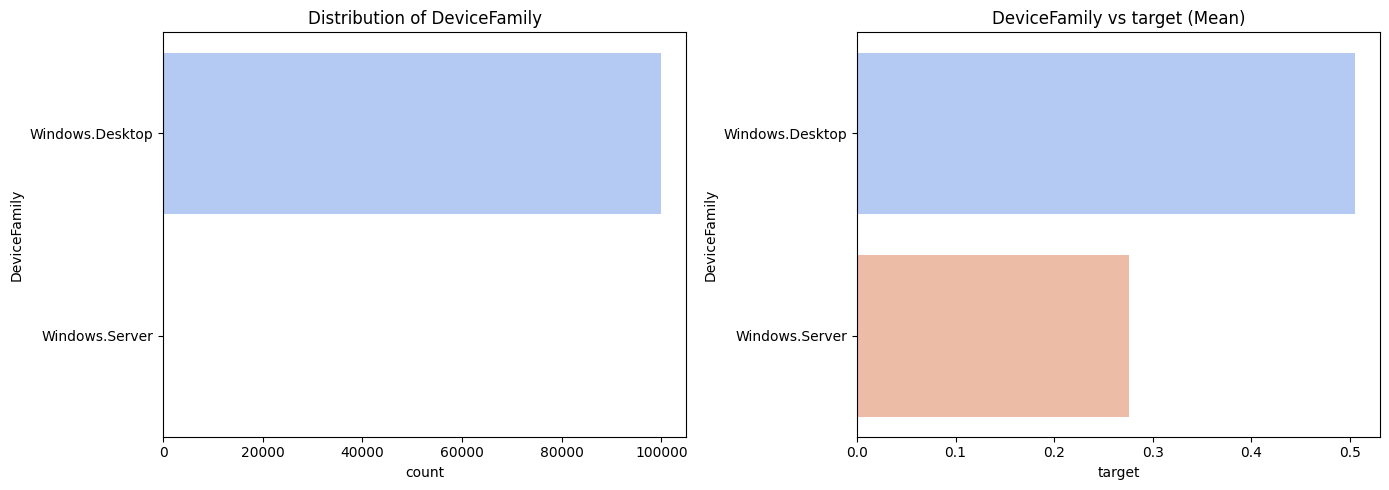

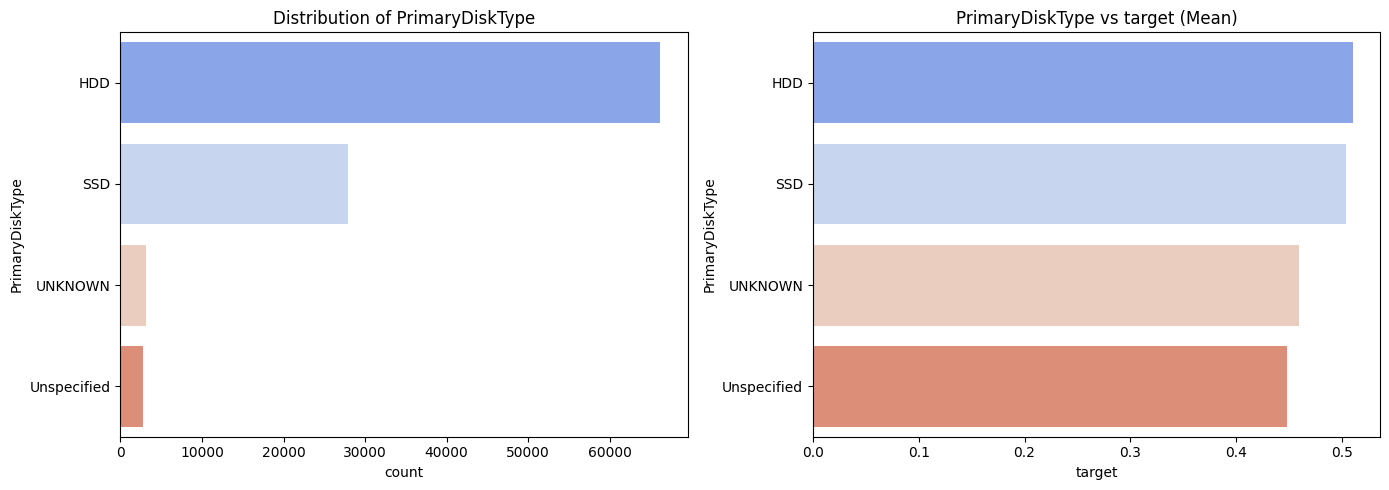

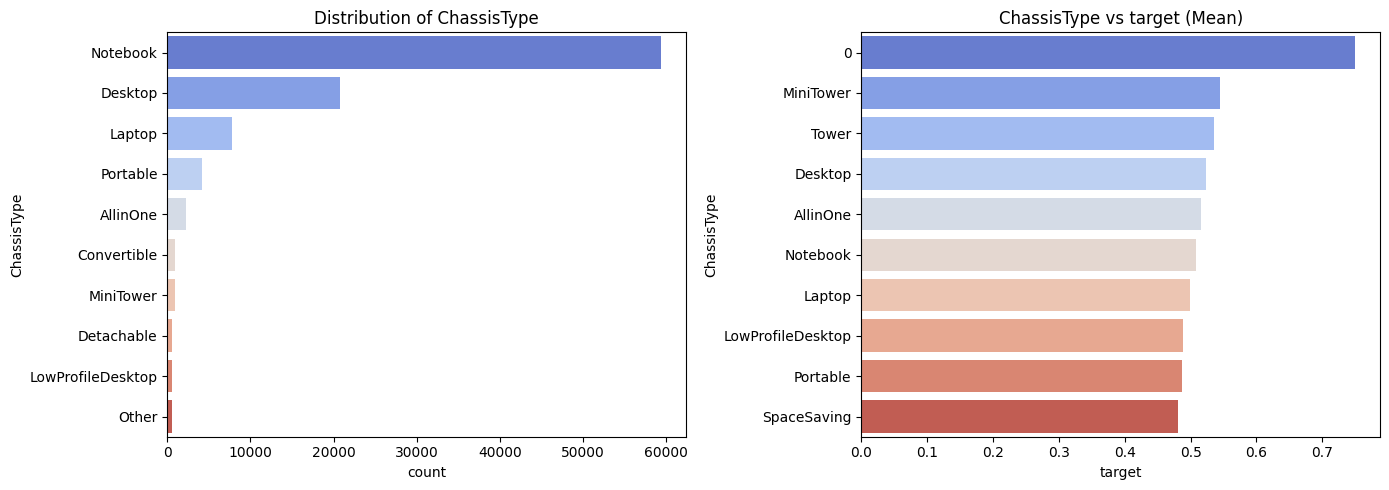

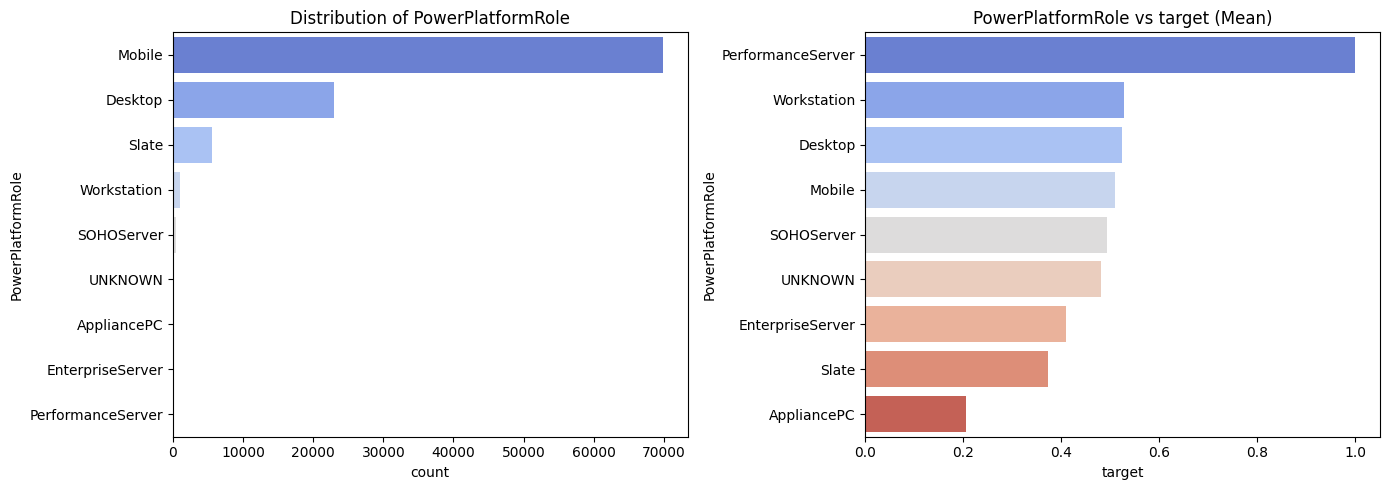

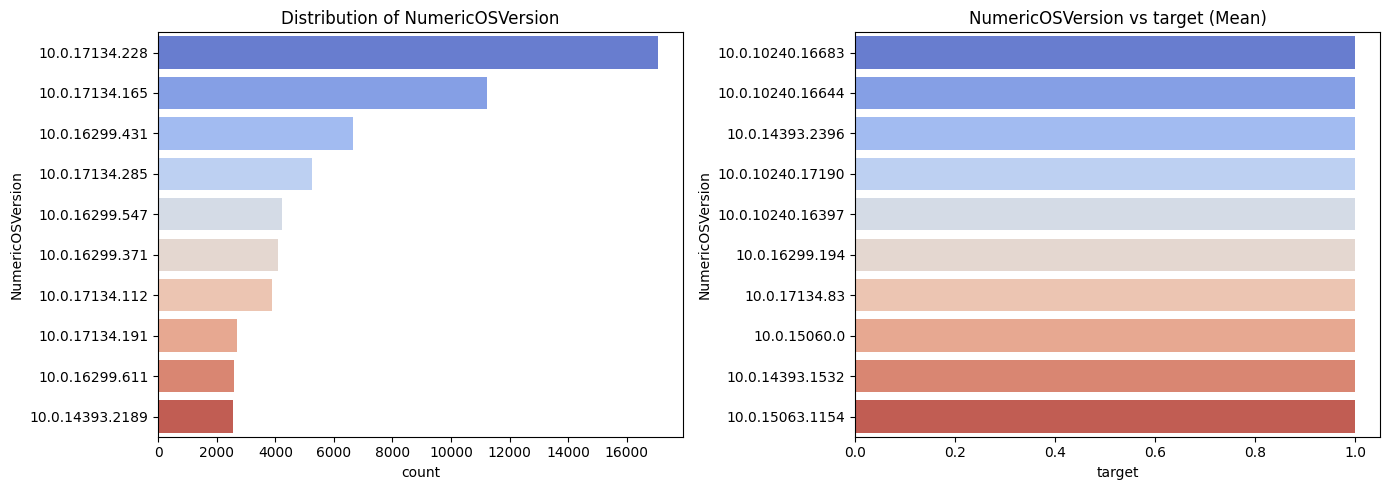

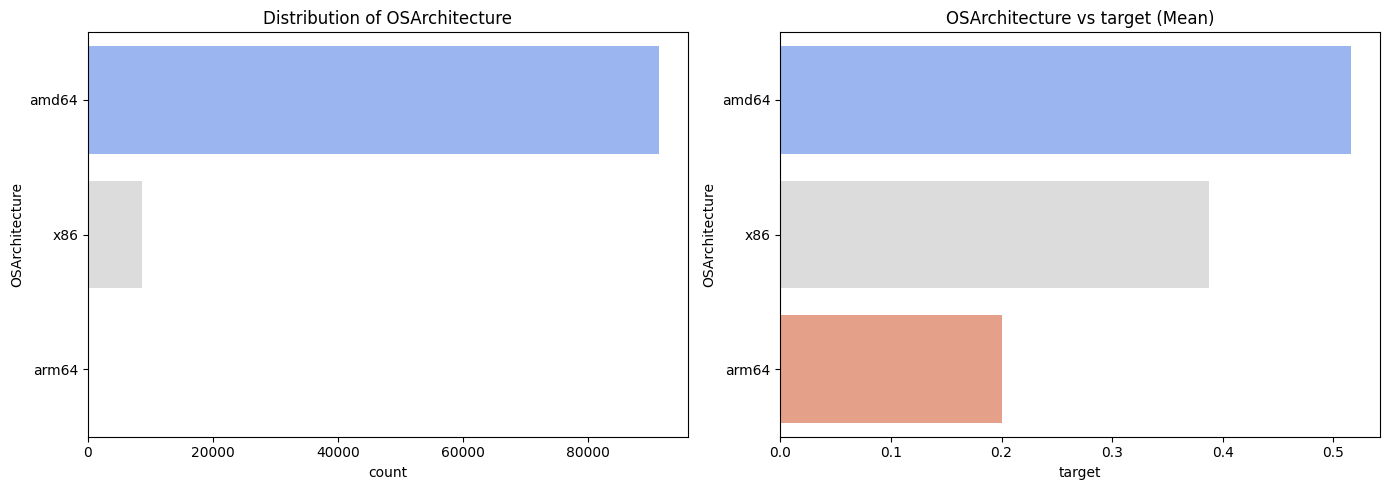

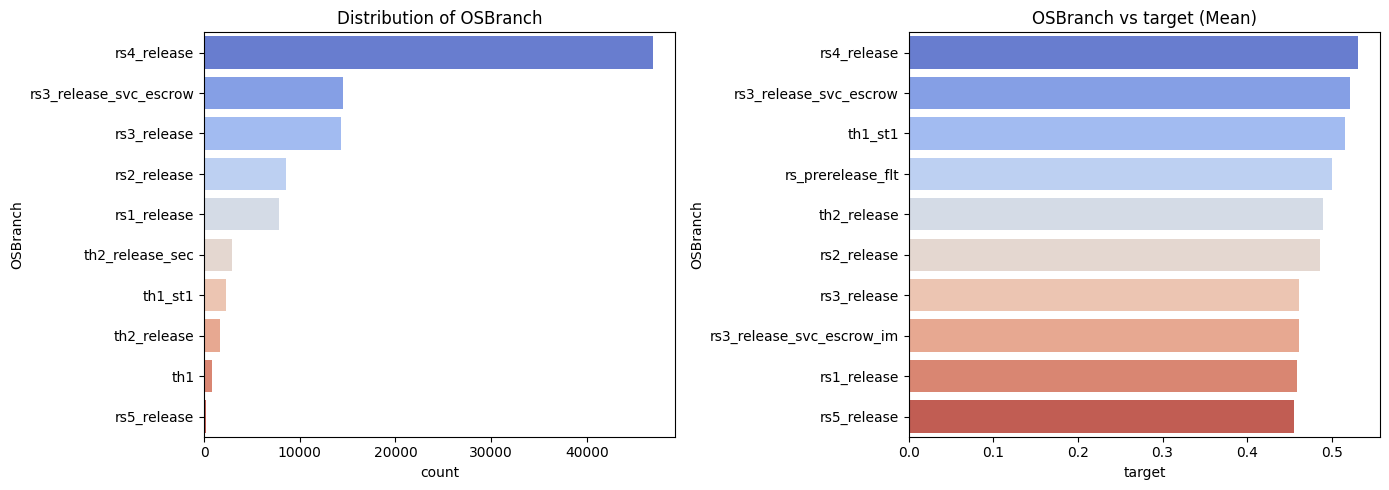

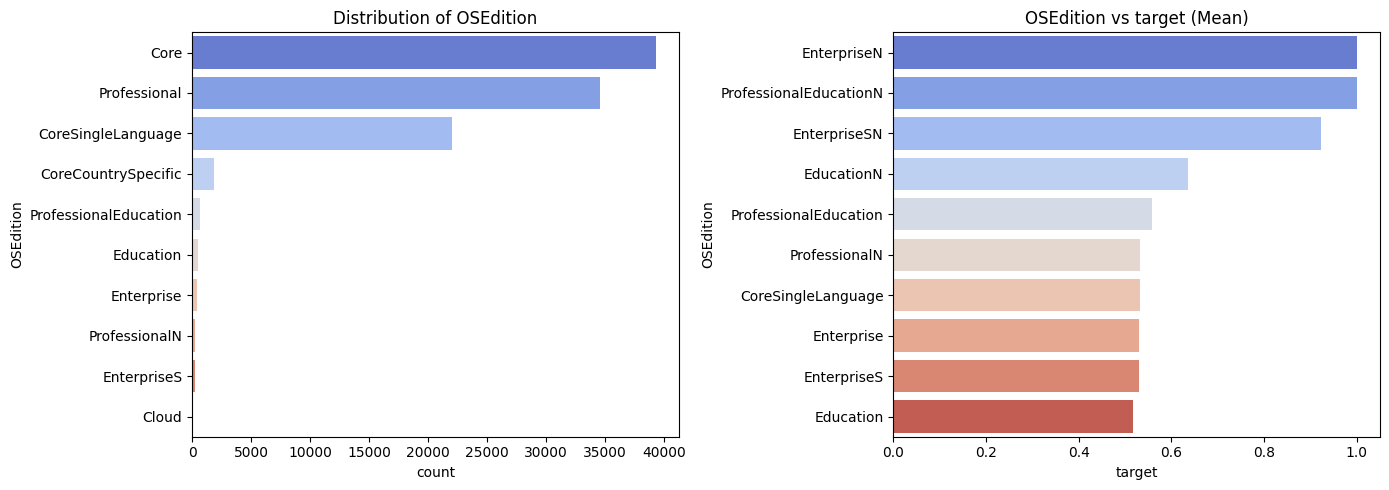

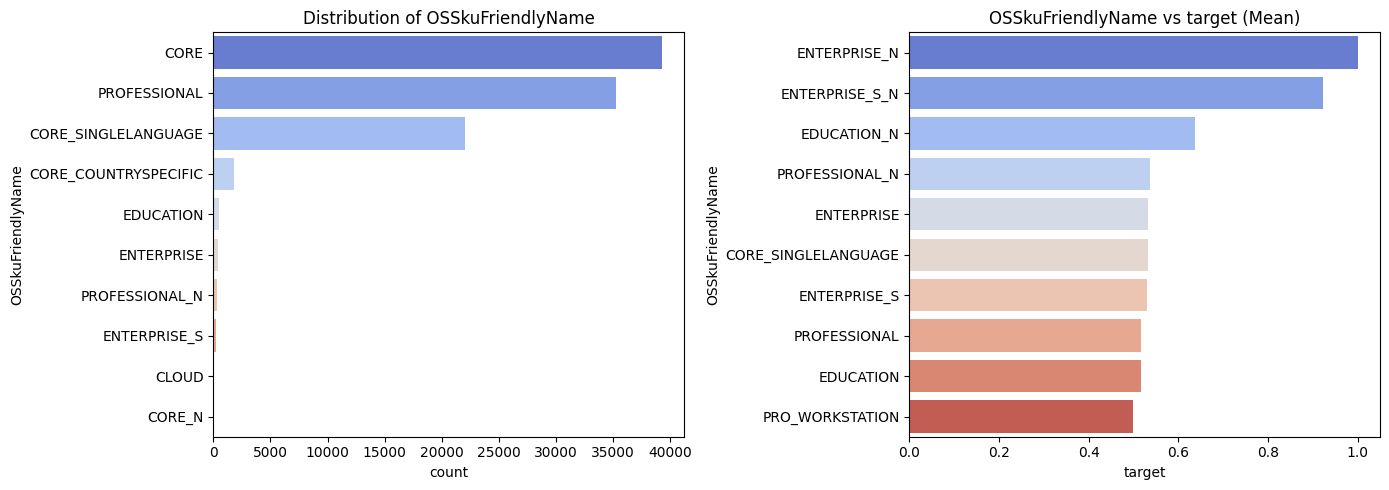

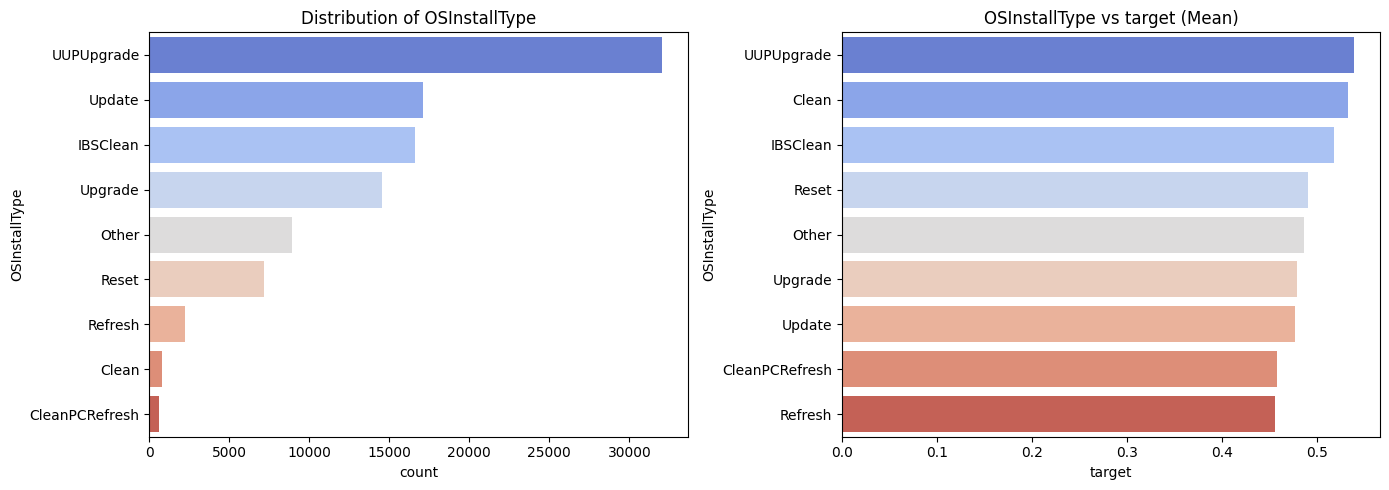

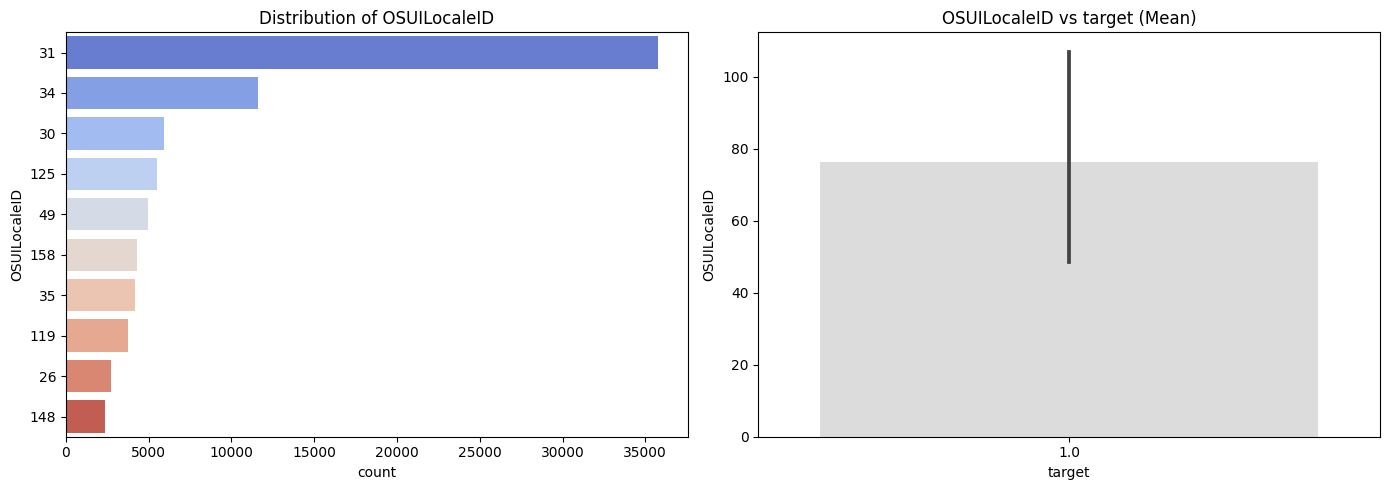

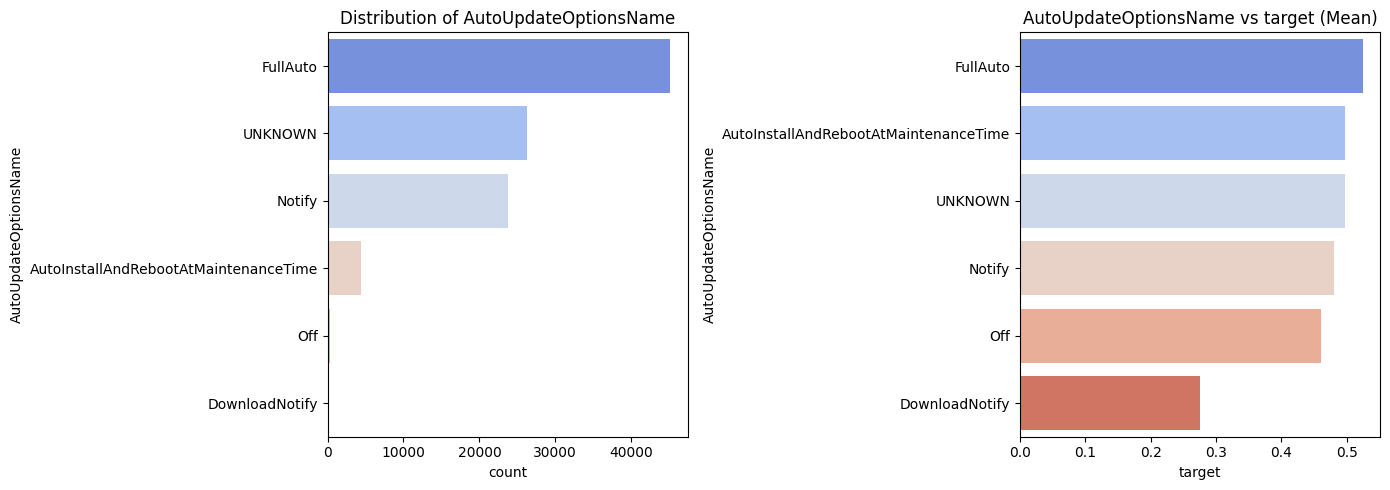

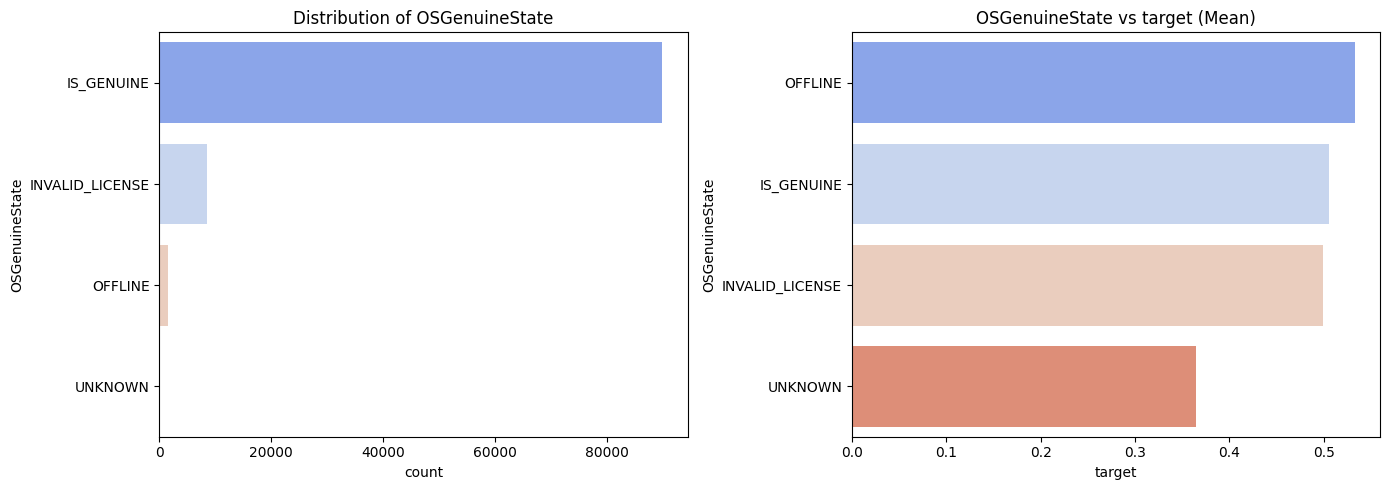

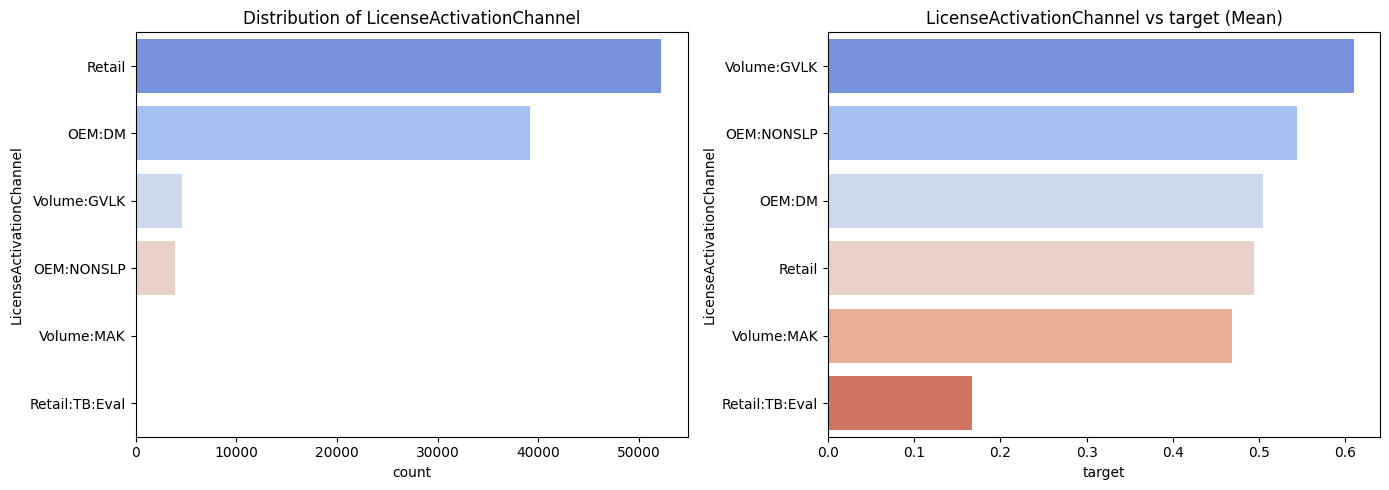

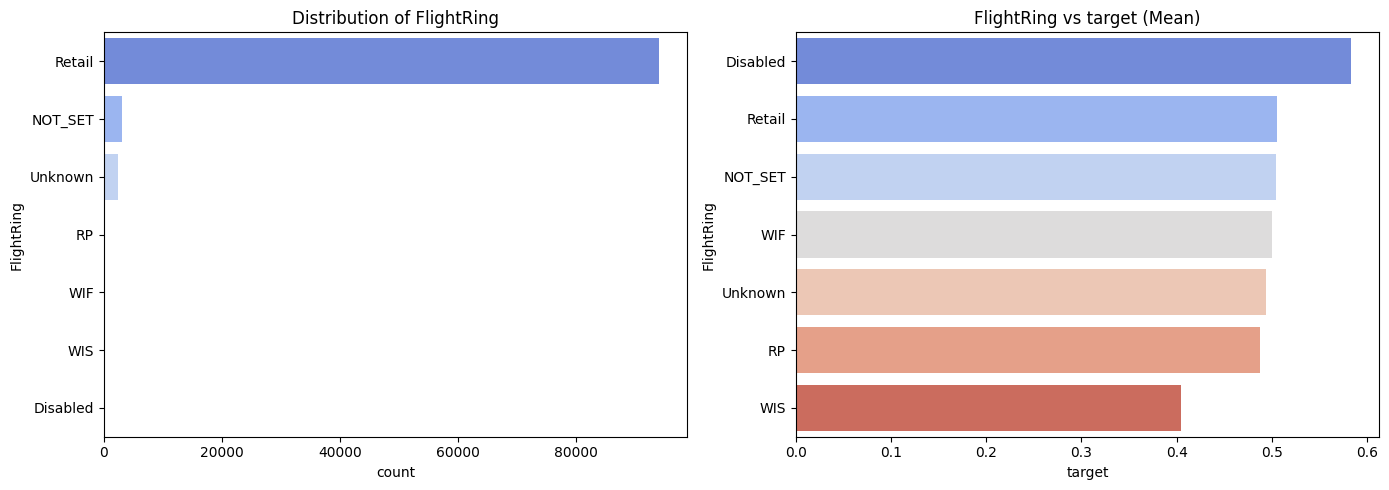

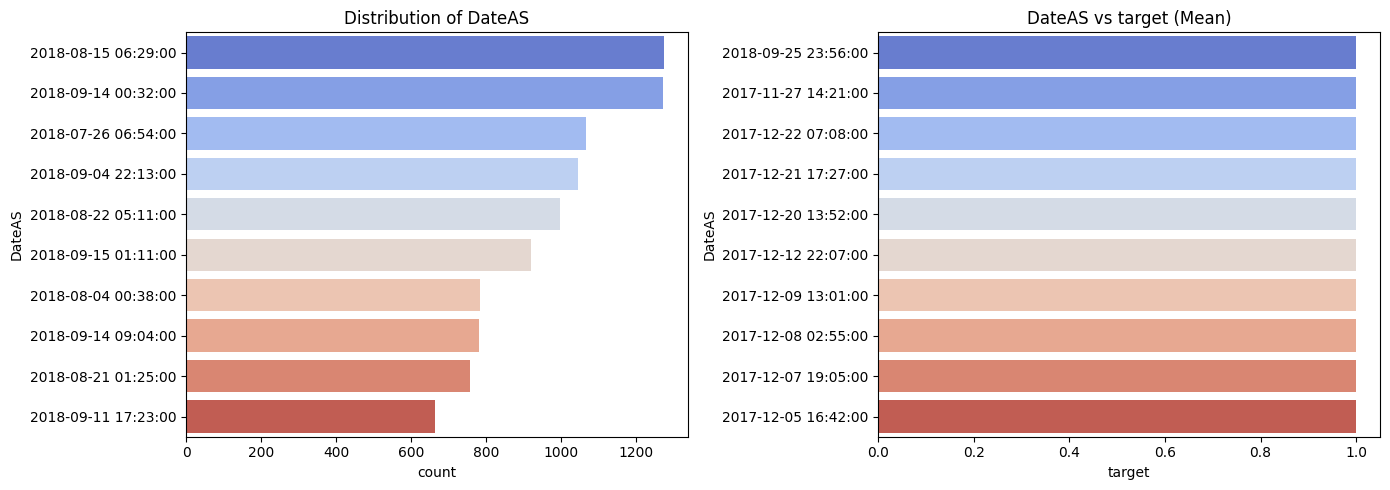

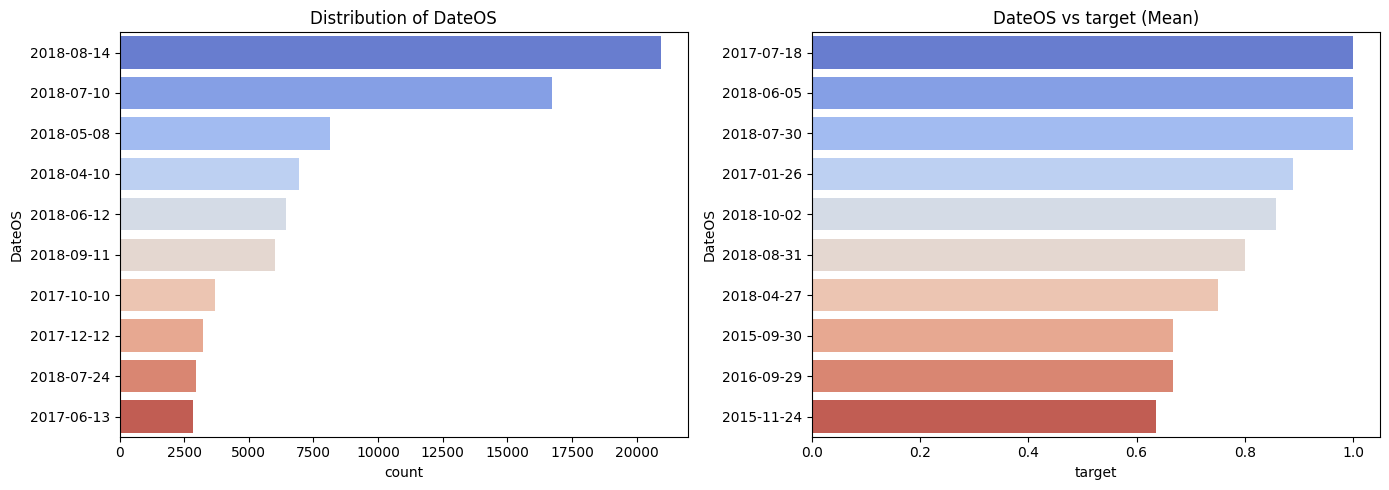

In [31]:
# Select categorical features
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns

# Function to perform categorical EDA
def categorical_eda(df, categorical_features, target_col='target', top_n=10):
    for col in categorical_features:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Count Plot - Category Distribution
        sns.countplot(y=df[col], order=df[col].value_counts().index[:top_n], ax=axes[0], palette="coolwarm")
        axes[0].set_title(f"Distribution of {col}")

        # Target Mean Bar Plot - Category vs Target
        if target_col in df.columns:
            category_target_mean = df.groupby(col)[target_col].mean().sort_values(ascending=False)[:top_n]
            sns.barplot(x=category_target_mean, y=category_target_mean.index, ax=axes[1], palette="coolwarm")
            axes[1].set_title(f"{col} vs {target_col} (Mean)")

        plt.tight_layout()
        plt.show()

# Run EDA
categorical_eda(train_df, categorical_features)


In [32]:
high_cardinality_cols = [col for col in X.columns if X[col].nunique() > 100]
print("High Cardinality Columns:", high_cardinality_cols)


High Cardinality Columns: ['AntivirusConfigID', 'CityID', 'IEVersionID', 'OEMNameID', 'OEMModelID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildRevisionOnly', 'FirmwareManufacturerID', 'FirmwareVersionID']


In [33]:
missing_values = train_df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])



Missing Values:
 Series([], dtype: int64)


In [34]:
import scipy.stats as ss

# Select Categorical Columns
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns

# Function to Calculate Cramér's V
def cramers_v(x, y):
    """Compute Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min(r_corr-1, k_corr-1))

# Compute Cramér’s V for all categorical pairs
cramers_results = []
for i, col1 in enumerate(cat_cols):
    for col2 in cat_cols[i+1:]:  # Avoid duplicate pairs
        value = cramers_v(train_df[col1], train_df[col2])
        if value > 0.7:  # High correlation threshold
            cramers_results.append((col1, col2, value))

# Sort by correlation strength
cramers_results = sorted(cramers_results, key=lambda x: x[2], reverse=True)

# Display Highly Correlated Categorical Features
print("\nHighly Correlated Categorical Features (Cramér's V > 0.7):")
for col1, col2, value in cramers_results:
    print(f"{col1} and {col2} → Cramér's V: {value:.2f}")

# Convert to DataFrame for better visualization
cramers_df = pd.DataFrame(cramers_results, columns=["Feature1", "Feature2", "CramersV"])
print("\n", cramers_df)



Highly Correlated Categorical Features (Cramér's V > 0.7):
PlatformType and DeviceFamily → Cramér's V: 1.00
DeviceFamily and AutoUpdateOptionsName → Cramér's V: 1.00
DeviceFamily and OSSkuFriendlyName → Cramér's V: 1.00
DeviceFamily and OSEdition → Cramér's V: 1.00
SignatureVersion and DateAS → Cramér's V: 1.00
NumericOSVersion and DateOS → Cramér's V: 1.00
OsPlatformSubRelease and OSBuildLab → Cramér's V: 1.00
Processor and OSBuildLab → Cramér's V: 1.00
Processor and OSArchitecture → Cramér's V: 1.00
OSBuildLab and OSArchitecture → Cramér's V: 1.00
ProductName and PlatformType → Cramér's V: 0.99
ProductName and OSVersion → Cramér's V: 0.99
ProductName and OsPlatformSubRelease → Cramér's V: 0.99
ProductName and OSBuildLab → Cramér's V: 0.99
OSEdition and OSSkuFriendlyName → Cramér's V: 0.99
OSBuildLab and OSBranch → Cramér's V: 0.96
NumericOSVersion and OSBranch → Cramér's V: 0.96
SKUEditionName and OSSkuFriendlyName → Cramér's V: 0.93
SKUEditionName and OSEdition → Cramér's V: 0.92
E

# Drop redundant categorical features
drop_cols = [
    "DeviceFamily", "AutoUpdateOptionsName", "OSSkuFriendlyName", "OSEdition",
    "DateAS", "DateOS", "OSBuildLab", "Processor", "OSArchitecture",
    "PlatformType", "OSVersion", "OsPlatformSubRelease", "OSBranch",
    "SignatureVersion", "NumericOSVersion", "SKUEditionName"
]

Duplicate Columns: ['AutoSampleSubmissionEnabled']
Highly Correlated Columns: []
Low Variance Columns: ['IsBetaUser', 'HasTpm', 'AutoSampleSubmissionEnabled', 'SMode', 'IsPortableOS', 'IsFlightsDisabled', 'IsVirtualDevice']
Constant Columns: ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']

Numerical features with correlation < 0.3 with target:
['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'CityID', 'OSBuildNumber', 'OSProductSuite', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'IsPortableOS', 'FirmwareManufacturerID', 'FirmwareVersionID', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier']
40

Highly Correlated Pairs (Correlation > 0.7):
IsPassiveModeEnabled and RealTimeProtectionState: Correlation = -0.90
ProcessorModelID and ProcessorManufacturerID: Correlation = 0.80
SystemVolumeCapacityMB and PrimaryDiskCapacityMB: Correlation = 0.77
PrimaryDisplayResolutionVertical and PrimaryDisplayResolutionHorizontal: Correlation = 0.90
OSBuildNumberOnly and OSBuildNumber: Correlation = 0.95


categorical_features = train_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    print(f"{col}: {train_df[col].nunique()} unique values")
MachineID: 99835 unique values
ProductName: 2 unique values
EngineVersion: 37 unique values
AppVersion: 69 unique values
SignatureVersion: 2735 unique values
CountryID: 220 unique values
GeoRegionID: 239 unique values
LocaleEnglishNameID: 185 unique values
PlatformType: 4 unique values
Processor: 3 unique values
OSVersion: 7 unique values
OsPlatformSubRelease: 9 unique values
OSBuildLab: 281 unique values
SKUEditionName: 8 unique values
MDC2FormFactor: 11 unique values
DeviceFamily: 2 unique values
PrimaryDiskType: 4 unique values
ChassisType: 28 unique values
PowerPlatformRole: 9 unique values
NumericOSVersion: 221 unique values
OSArchitecture: 3 unique values
OSBranch: 13 unique values
OSEdition: 20 unique values
OSSkuFriendlyName: 18 unique values
OSInstallType: 9 unique values
OSUILocaleID: 64 unique values
AutoUpdateOptionsName: 6 unique values
OSGenuineState: 4 unique values
LicenseActivationChannel: 6 unique values
FlightRing: 7 unique values
DateAS: 2695 unique values
DateOS: 112 unique values

High Cardinality Columns: ['AntivirusConfigID', 'CityID', 'IEVersionID', 'OEMNameID', 'OEMModelID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildRevisionOnly', 'FirmwareManufacturerID', 'FirmwareVersionID']

MachineID: 99835 unique values
ProductName: 2 unique values
EngineVersion: 37 unique values
AppVersion: 69 unique values
SignatureVersion: 2735 unique values
CountryID: 220 unique values
GeoRegionID: 239 unique values
LocaleEnglishNameID: 185 unique values
PlatformType: 4 unique values
Processor: 3 unique values
OSVersion: 7 unique values
OsPlatformSubRelease: 9 unique values
OSBuildLab: 281 unique values
SKUEditionName: 8 unique values
MDC2FormFactor: 11 unique values
DeviceFamily: 2 unique values
PrimaryDiskType: 4 unique values
ChassisType: 28 unique values
PowerPlatformRole: 9 unique values
NumericOSVersion: 221 unique values
OSArchitecture: 3 unique values
OSBranch: 13 unique values
OSEdition: 20 unique values
OSSkuFriendlyName: 18 unique values
OSInstallType: 9 unique values
OSUILocaleID: 64 unique values
AutoUpdateOptionsName: 6 unique values
OSGenuineState: 4 unique values
LicenseActivationChannel: 6 unique values
FlightRing: 7 unique values
DateAS: 2695 unique values
DateOS: 112 unique values

# **Exploratory Data Analysis (EDA) Summary**

## **Data Cleaning & Redundant Features**
- **Dropped Unnecessary Columns**: Removed redundant categorical features such as *DeviceFamily, AutoUpdateOptionsName, OSSkuFriendlyName, OSEdition, DateAS, DateOS, OSBuildLab*, and others. These columns were either repetitive, not useful, or contained high-cardinality values that wouldn't add significant predictive power.
- **Dropped Duplicate Columns**: *AutoSampleSubmissionEnabled* was a duplicate column and removed.
- **Dropped Low Variance & Constant Columns**: *IsBetaUser, HasTpm, AutoSampleSubmissionEnabled, SMode, IsPortableOS, IsFlightsDisabled, IsVirtualDevice* were dropped due to little to no variance in their values.

## **Feature Correlation Analysis**
- **Low Correlation with Target (< 0.3)**: 40 numerical features had weak correlation with the target variable, including *RealTimeProtectionState, IsPassiveModeEnabled, CityID, OSBuildNumber, OSProductSuite, ProcessorCoreCount, TotalPhysicalRAMMB*, etc. These features may not contribute significantly to the model.
- **Highly Correlated Feature Pairs (> 0.7)**: 
  - *IsPassiveModeEnabled* and *RealTimeProtectionState* (-0.90)
  - *ProcessorModelID* and *ProcessorManufacturerID* (0.80)
  - *SystemVolumeCapacityMB* and *PrimaryDiskCapacityMB* (0.77)
  - *PrimaryDisplayResolutionVertical* and *PrimaryDisplayResolutionHorizontal* (0.90)
  - *OSBuildNumberOnly* and *OSBuildNumber* (0.95)  
  → Only one feature from each pair was retained to avoid multicollinearity.

## ** High-Cardinality Categorical Features**
- Some categorical features contained a large number of unique values, making them difficult to encode effectively. These included:
  - *AntivirusConfigID, CityID, IEVersionID, OEMNameID, ProcessorModelID, SystemVolumeCapacityMB, PrimaryDisplayResolutionHorizontal, InternalBatteryNumberOfCharges, OSBuildRevisionOnly, FirmwareManufacturerID*, etc.
  - Features with very high cardinality were either dropped or grouped into meaningful categories before encoding.

## **Categorical Data Summary**
- Several categorical features had a small number of unique values and were suitable for one-hot encoding, such as:
  - *ProductName (2 values), Processor (3 values), PlatformType (4 values), OSArchitecture (3 values), DeviceFamily (2 values), LicenseActivationChannel (6 values)*
- Some categorical features had a moderate number of unique values and could be encoded using target encoding or frequency encoding:
  - *CountryID (220 values), LocaleEnglishNameID (185 values), PowerPlatformRole (9 values), ChassisType (28 values)*

## ** Final Steps Before Model Training**
- **Dropped redundant and highly correlated features** to reduce multicollinearity.
- **Encoded categorical variables** using one-hot encoding for low-cardinality features and target/frequency encoding for high-cardinality ones.
- **Standardized numerical features** to improve model performance.

---

### ** Key Takeaways**
Removed duplicate, low-variance, and highly correlated features.  
Identified and processed high-cardinality categorical variables.  
Encoded categorical data appropriately using one-hot and target encoding.  
Standardized numerical features for better model performance.  



Feature Engineering >>Selector PCA, SelectKBest, RFE

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [82]:
# Assume your data is already preprocessed (categorical encoding done)
# Replace 'target' with your actual target column name
X = imputed_df.drop('target', axis=1)
y = imputed_df['target']
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Encode all categorical columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string just in case

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),               # Scale before PCA
    ('pca', PCA(n_components=0.95)),            # Keep 95% variance
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline_pca.fit(X_train, y_train)
y_pred_pca = pipeline_pca.predict(X_test)
print("PCA + Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_pca))


PCA + Logistic Regression Accuracy: 0.59295


In [84]:
pipeline_selectkbest = Pipeline([
    ('select', SelectKBest(score_func=f_classif, k=20)),  # Select top 20 features
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

pipeline_selectkbest.fit(X_train, y_train)
y_pred_selectkbest = pipeline_selectkbest.predict(X_test)
print("SelectKBest + XGBoost Accuracy:", accuracy_score(y_test, y_pred_selectkbest))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 5 25 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest + XGBoost Accuracy: 0.61325


In [85]:
estimator = LogisticRegression(max_iter=1000)
pipeline_rfe = Pipeline([
    ('select', RFE(estimator=estimator, n_features_to_select=20)),
    ('clf', estimator)
])

pipeline_rfe.fit(X_train, y_train)
y_pred_rfe = pipeline_rfe.predict(X_test)
print("RFE + Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_rfe))


RFE + Logistic Regression Accuracy: 0.5061


******Preprocessing******

In [99]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_data = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# Define Relevant Columns
relevant_columns = [
    'EngineVersion', 'AppVersion', 
    'IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled', 
    'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm',
    'ProcessorCoreCount', 'ProcessorModelID', 'PrimaryDiskType', 
    'TotalPhysicalRAMMB', 'PrimaryDiskCapacityMB', 'OSVersion', 'OSBuildNumber', 
    'NumericOSVersion', 'OsPlatformSubRelease', 'SKUEditionName', 'IsSecureBootEnabled', 
    'IsSystemProtected', 'IsGamer', 'IsVirtualDevice', 'AutoSampleSubmissionEnabled', 
    'FirewallEnabled', 'EnableLUA', 'GeoRegionID', 'LocaleEnglishNameID', 
    'RegionIdentifier', 'DateAS', 'DateOS', 'target'
]

df = df[relevant_columns]

# Test Data Relevant Columns (Excluding target)
relevant_columns_test = relevant_columns[:-1]  # Excluding 'target'
test_data = test_data[relevant_columns_test]

df['DateAS'] = pd.to_datetime(df['DateAS']).dt.month
df['DateOS'] = pd.to_datetime(df['DateOS']).dt.month

test_data['DateAS'] = pd.to_datetime(test_data['DateAS']).dt.month
test_data['DateOS'] = pd.to_datetime(test_data['DateOS']).dt.month

# Convert Integer Columns to Object (Categorical)
int_col = [
    "IsBetaUser", "LocaleEnglishNameID", "AutoSampleSubmissionEnabled",
    "FirewallEnabled", "EnableLUA", "ProcessorModelID", "IsSecureBootEnabled", 
    "IsGamer", "RegionIdentifier", "target"
]

int_col_test = int_col[:-1]  # Exclude 'target' for test data

df[int_col] = df[int_col].astype("object")
test_data[int_col_test] = test_data[int_col_test].astype("object")

# Impute Missing Values (Numerical Columns)
num_cols = ['NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 
            'ProcessorCoreCount', 'PrimaryDiskCapacityMB', 'TotalPhysicalRAMMB','RealTimeProtectionState']

imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])
test_data[num_cols] = imputer_num.transform(test_data[num_cols])

# Convert to Integer After Imputation
df[num_cols] = np.floor(df[num_cols]).astype(int)
test_data[num_cols] = np.floor(test_data[num_cols]).astype(int)

# Impute Missing Values (Categorical Columns)
cato_list = [
    'EngineVersion', 'AppVersion', 'ProcessorModelID', 
    'GeoRegionID', 'LocaleEnglishNameID', 'RegionIdentifier', 'PrimaryDiskType',"IsSystemProtected", "IsGamer", "IsVirtualDevice", "FirewallEnabled", "EnableLUA", "DateOS" 
]

imputer_cat = SimpleImputer(strategy='most_frequent')
df[cato_list] = imputer_cat.fit_transform(df[cato_list])
test_data[cato_list] = imputer_cat.transform(test_data[cato_list])

# Label Encoding Categorical Columns
label_encoders = {}

for col in cato_list:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  # Convert to string before encoding
    df[col] = le.fit_transform(df[col])  # Fit and transform on train data

    # Handle test data (avoid unseen labels)
    test_data[col] = test_data[col].astype(str)
    test_data[col] = test_data[col].map(lambda x: x if x in le.classes_ else "unknown")
    
    # Add "unknown" category to LabelEncoder and transform test data
    le.classes_ = np.append(le.classes_, "unknown")
    test_data[col] = le.transform(test_data[col])

    label_encoders[col] = le  # Store encoder for later use

# Scale Numerical Features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

In [100]:
# List of categorical columns to encode
categorical_cols = ["OSVersion", "NumericOSVersion", "OsPlatformSubRelease", "SKUEditionName"]

# Dictionary to store LabelEncoders
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Fit & transform on training data
    label_encoders[col] = le  # Store the encoder for future use

# Dictionary to store LabelEncoders
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col].astype(str))  # Fit & transform on training data
    label_encoders[col] = le  # Store the encoder for future use

In [101]:
y = (df['target'] > 0.5).astype(int)  # Converts probabilities to binary labels (0 or 1)


# Separate features and target
X = df.drop(columns=['target'])
#y = df['target']
y = (df['target'] > 0.5).astype(int)  # Converts probabilities to binary labels (0 or 1)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**LOGISTIC REGRESSION**

In [102]:
# Initialize the Logistic Regression model
# Use 'lbfgs' solver for small to medium datasets
log_model = LogisticRegression(max_iter=1000, penalty='l2', random_state=42)

# Train the model
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [103]:
# Make predictions
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Top 10 Important Features:\n", feature_importance.head(10))

Accuracy: 0.5881
ROC-AUC Score: 0.6153398012130837
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.49      0.54      9895
           1       0.58      0.68      0.63     10105

    accuracy                           0.59     20000
   macro avg       0.59      0.59      0.58     20000
weighted avg       0.59      0.59      0.58     20000

Top 10 Important Features:
                     Feature  Coefficient
11       TotalPhysicalRAMMB     0.094709
12    PrimaryDiskCapacityMB     0.085457
3   RealTimeProtectionState     0.085347
8        ProcessorCoreCount     0.082208
20                  IsGamer     0.047329
29                   DateOS     0.026827
19        IsSystemProtected     0.020532
28                   DateAS     0.019060
0             EngineVersion     0.015450
18      IsSecureBootEnabled     0.007129


**Naive Bayes model**

In [104]:
# Train model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.55045
ROC-AUC Score: 0.6099911515244556
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.22      0.33      9895
           1       0.53      0.87      0.66     10105

    accuracy                           0.55     20000
   macro avg       0.58      0.55      0.49     20000
weighted avg       0.58      0.55      0.50     20000



In [65]:
# Train-Test Split
y = df['target']
X = df.drop(columns=['target'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)
test_data.columns = test_data.columns.astype(str)

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
# Convert target to numeric if necessary
if not np.issubdtype(y.dtype, np.number):
    y = pd.factorize(y)[0]  # Converts categorical target into numerical labels

#  Split into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#  Ensure column names are strings (optional, but sometimes necessary)
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

#  Train Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#  Validate Model
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.5405


In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [71]:
# Define AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME']
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate on validation set
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Validation Accuracy: {accuracy:.4f}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 150}
Validation Accuracy: 0.5970


In [8]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [23]:
# preprocessing for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'), categorical_cols),],
    remainder='passthrough' #numerical doesn't need endoing for XGBoost
)

#creating pipeline for preprocessing and model 
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42))
])


Hyperparameter tuning in XGBOOSTCLASSIFIER

In [26]:
# Define hyperparameter grid for XGBoost
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 6],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

In [27]:
# GridSearchCV with Pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Results
print("Best Params:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Params: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Best CV Accuracy: 0.6142875


compare Logistic Regression, AdaBoost, and XGBoostClassifier

Here logistic regression adaboost and xgboostclassifier is used without column selection or extraction ,in the above cells i used it with column selection and exttraction.


In [105]:
train_df=pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_df=pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
#Copy dataset to aviod modifying original
imputed_df = train_df.copy()

#Impute Numerical Columns
numeric_cols =imputed_df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if imputed_df[col].isnull().sum() > 0:
        #use median if the data is skewed , otherwise mean
        median = imputed_df[col].median()
        mean = imputed_df[col].mean()
        imputed_df[col].fillna(median, inplace=True) #using median by default


#Imputed Categorical Columns
categorical_cols = imputed_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if imputed_df[col].isnull().sum()>0:
        mode_value = imputed_df[col].mode()[0] #get most frequent value
        imputed_df[col].fillna(mode_value, inplace=True)
print("Missin values imputed successfully!!!!!!")

Missin values imputed successfully!!!!!!


In [106]:
from sklearn.tree import DecisionTreeClassifier
# Convert target to numeric if necessary
if not np.issubdtype(y.dtype, np.number):
    y = pd.factorize(y)[0]  # Converts categorical target into numerical labels

#  Split into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#  Ensure column names are strings (optional, but sometimes necessary)
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

#  Train Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#  Validate Model
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.5405


In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

#used only imputed_df

# --------------------  Logistic Regression --------------------
log_model = LogisticRegression(max_iter=1000, penalty='l2', random_state=42)
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)
y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_log = accuracy_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)

print(" Logistic Regression")
print("Accuracy:", accuracy_log)
print("ROC-AUC Score:", roc_auc_log)
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Top 10 Important Features:\n", feature_importance.head(10))


# --------------------  AdaBoost Classifier --------------------
adaboost = AdaBoostClassifier(random_state=42)

# Hyperparameter grid
param_grid_ada = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 1.0],
    'algorithm': ['SAMME']
}

# Grid Search
grid_search_ada = GridSearchCV(estimator=adaboost, param_grid=param_grid_ada,
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_ada.fit(X_train, y_train)

# Best model and evaluation
best_ada = grid_search_ada.best_estimator_
y_pred_ada = best_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, best_ada.predict_proba(X_test)[:,1])

print("\n AdaBoost Classifier")
print(f"Best Parameters: {grid_search_ada.best_params_}")
print("Accuracy:", accuracy_ada)
print("ROC-AUC Score:", roc_auc_ada)
print("Classification Report:\n", classification_report(y_test, y_pred_ada))


# --------------------  XGBoost Classifier (with Pipeline) --------------------
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as is
)

# Pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [100],
    'classifier__learning_rate': [0.1],
    'classifier__max_depth': [3],
    'classifier__subsample': [1.0],
    'classifier__colsample_bytree': [1.0]
}

# Grid Search for XGBoost
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Best model and evaluation
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:,1])

print("\n XGBoost Classifier")
print("Best Params:", grid_search_xgb.best_params_)
print("Accuracy:", accuracy_xgb)
print("ROC-AUC Score:", roc_auc_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


# -------------------- Comparison Summary --------------------
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'AdaBoost', 'XGBoost'],
    'Accuracy': [accuracy_log, accuracy_ada, accuracy_xgb],
    'ROC-AUC': [roc_auc_log, roc_auc_ada, roc_auc_xgb]
})

print("\nModel Comparison Summary")
print(results)


 Logistic Regression
Accuracy: 0.57855
ROC-AUC Score: 0.5992077326525249
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.50      0.54      9895
           1       0.57      0.66      0.61     10105

    accuracy                           0.58     20000
   macro avg       0.58      0.58      0.58     20000
weighted avg       0.58      0.58      0.58     20000

Top 10 Important Features:
                     Feature  Coefficient
11       TotalPhysicalRAMMB     0.072979
29                   DateOS     0.066036
8        ProcessorCoreCount     0.064482
12    PrimaryDiskCapacityMB     0.058806
3   RealTimeProtectionState     0.058422
20                  IsGamer     0.031697
28                   DateAS     0.021841
0             EngineVersion     0.019489
19        IsSystemProtected     0.012730
16     OsPlatformSubRelease     0.008871
Fitting 5 folds for each of 4 candidates, totalling 20 fits

 AdaBoost Classifier
Best Parameters

Final score = 0.61505